# CMPE-257 Machine Learning -NLP Part3
Analyzing and Comparing Sample Texts to Gold Standard Using Sentiment Analysis, Topic Modeling, POS Tagging, and Knowledge Graphs</br>

**Team Name:** Code Wizards <br/>
**Team Members:** Bhavya Hegde, Blessy Dickson Daniel Moses, Darshini Venkatesha Murthy Nag, Sirisha Polisetty<br/>




# Homework

# Task 1: Represent each poem as a knowledge graph
1.1 Use POS tagging to identify noun-verb-noun relationships in each poem.
1.2 Create binary graphs for each poem using networkx.
1.3 Use transitive closure to create larger graphs for each poem.

# Task 2: Compare regular poems with pushcart nominated or awarded poems
2.1 Count POS, topics, sentiment in each poem.
2.2 Calculate ratios of NN/Verbs, NN/Adv, NN/Adjectives for each poem.
2.3 Compare statistics between regular and pushcart nominated/awarded poems.

# Task 3: Create a JSON "repository" for each poet
3.1 Store poems, POS, topics for each poet in a JSON file.

# Task 4: Use top2vec and doc2vec for comparison
4.1 Compare gold standard poems with normal poems using top2vec and doc2vec.

# Data Scraping
Scrape gold standard data from Pushcart nominations or winners from at least 3 different websites.
- Total of no less than 20 poems.
Scrape other non-pushcart nominated poems from at least three different websites.
- Total of no less than 20 poems preferably written in the same year.

# Sample websites for data scraping
- [Iowa Poetry Pushcart 2022](https://iowapoetry.com/pushcart2022.htm)
- [Rattle](https://www.rattle.com/info/news/)
- [Roadrunner](https://roadrunner.lasierra.edu/nominations-for-the-2022-pushcart-prize/)
- [Prolific Pulse Blog](https://prolificpulse.blog/2022/10/18/pushcart-nominations-2022/)
- [Pulp Literature](https://pulpliterature.com/announcing-pulp-literatures-2022-pushcart-prize-nominees/)

# Building on Week 11

## A. Stats
- Plots: distributions of POS (n, v, adj, adv).
- Compare the dist of POS in each poem.
- Superimpose them on each other in terms of ratios of POS.
- "Gold/reference standard": What did the nominated poems have in common (common denominator)?
- Plot stats.

## B. Topic
- Analyze topics for the prize-winning poems of that year.
- Analyze topics in sampled poems.
- Compare the two.

## C. Sentiment Analysis
- Analyze sentiments for the prize-winning poems of that year.
- Compare the gold std you create against other poems written in that year (e.g., 2018 poems).
- Analyze the deltas: Stats, Topics, Sentiment.
- Write up a narrative that describes your understanding of why these latter poems did not meet the gold standard for that year.

## D. Analyze and Rank the "new" poems relative to the pushcart nominated ones
- Devise a ranking system.
- Compare new poems and some other pushcart nominees with the gold standard to establish a baseline.


In [3]:
# # Installing necessary libraries for NLP, data analysis, web development, and other tasks.
!pip3 install nltk
!pip3 install sentence-transformers
!pip3 install contractions
!pip3 install pandas
!pip install bertopic
!pip install gensim
!pip install pyLDAvis
!pip install spacy
!pip install requests
!pip install pyvis
!pip install beautifulsoup4
!pip install lxml
!pip install fastapi kaleido python-multipart uvicorn
!pip install numpy==1.23.3 pandas==1.5.3
!pip install top2vec
!pip install top2vec[sentence_encoders]
!pip install tensorflow tensorflow_hub tensorflow_text

  Using cached numpy-1.26.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached pandas-2.1.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.1 which is incompatible.
tensorflow-probability 0.22.0 requires typing-ext

  Using cached numpy-1.26.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.3
    Uninstalling numpy-1.23.3:
      Successfully uninstalled numpy-1.23.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.23.5 which is incompatible.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.


In [1]:
# # Importing libraries for NLP, web scraping, data analysis, and Google Colab drive mounting.
import requests
import pandas as pd
import bs4 as bs
import urllib.request
import json
import contractions
import re
import nltk
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
from nltk.corpus import stopwords
from transformers import pipeline
from spacy import displacy
from bertopic import BERTopic
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import pyLDAvis
import gensim
import spacy
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
from gensim.utils import simple_preprocess
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from gensim import corpora
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import string
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import math
import torch
from pyvis.network import Network

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)


In [2]:
# Suppressing specific warning messages to maintain clear and concise output.
import warnings
warnings.filterwarnings('ignore', 'Calling')
warnings.filterwarnings('ignore', 'For a faster implementation')
warnings.filterwarnings('ignore', 'In')
warnings.filterwarnings('ignore', 'SelectableGroups dict interface')
warnings.filterwarnings('ignore', '`np')
warnings.filterwarnings('ignore', 'SelectableGroups')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# Downloading necessary NLTK data packages for text processing.
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is

True

#**Pushcart Nominated poems**

In [4]:
store_loc = "/content/drive/MyDrive/Pushcart/"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
import requests
from bs4 import BeautifulSoup
import csv
import os

def scrape_poems(html_content, year):
    soup = BeautifulSoup(html_content, 'html.parser')
    poem_data_list = []

    # Find all <h1> elements which contain author names
    author_elements = soup.find_all('h1')

    # Iterate through the author elements
    for i in range(len(author_elements)):
        author_name = author_elements[i].text.strip()

        # Get the next element after the author
        next_element = author_elements[i].find_next()

        # Initialize poem content and title
        poem_content = ""
        poem_title = ""

        # Continue until the next author element is encountered
        while next_element and next_element.name != 'h1':
            if next_element.name == 'p':
                # Check for and exclude lines containing "IPA Nominees for the 20XX Pushcart Prize"
                if "IPA Nominees for the" in next_element.get_text():
                    break
                if not poem_title:
                    # Set the first line as the title
                    poem_title = next_element.get_text(strip=True)
                else:
                    poem_content += next_element.get_text(strip=True) + "\n"
            next_element = next_element.find_next()

        # Remove '\r' from poem content
        poem_content = poem_content.replace('\r', '').replace('\xa0', '')

        poem_data = {
            "Year": year,
            "Author": author_name,
            "Title": poem_title,
            "Poem": poem_content.strip(),  # Remove extra whitespace
        }

        poem_data_list.append(poem_data)

    return poem_data_list

# List of URLs to scrape
poem_urls = [
    ("https://iowapoetry.com/pushcart2023.htm", 2023),
    ("https://iowapoetry.com/pushcart2022.htm", 2022),
    ("https://iowapoetry.com/pushcart2021.htm", 2021),
]

if not os.path.exists(store_loc):
    os.makedirs(store_loc)

all_poem_data = []

for url, year in poem_urls:
    response = requests.get(url)
    if response.status_code == 200:
        html_content = response.text
        poem_data_list = scrape_poems(html_content, year)
        all_poem_data.extend(poem_data_list)

# Save the scraped data as a CSV
csv_file_path = os.path.join(store_loc, "Pushcart_Nominations.csv")

with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Year', 'Author', 'Title', 'Poem']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(all_poem_data)

print(f"CSV file saved successfully at {csv_file_path}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CSV file saved successfully at /content/drive/MyDrive/Pushcart/Pushcart_Nominations.csv


In [6]:
data=pd.read_csv('/content/drive/MyDrive/Pushcart/Pushcart_Nominations.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Author,Title,Poem
0,2023,Christopher Hunter,"LOUISA, AGE 6, AT REST",Louisa alighting into placeAlways dazzles me.\...
1,2023,Susan J Koch,SOFIA,I cannot disrememberthree carefree boysdraggin...
2,2023,John Mitchell,NICHOLAS II,The ghost of the Tsar walks.He passes some Jew...
3,2023,Alise Palmer,BELTANE,"A boy green shouldered, growslike corn endless..."
4,2023,Rose Postma,ON TELLING MY MOTHER I AM PREGNANT AGAIN,"My mother, who spent the day after my birth tr..."


In [8]:
data['Poem'][0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Louisa alighting into placeAlways dazzles me.\nShe twists with surpassing graceInto an inverted curtsey.Her arms smoothly interlace,As she gets all topsy-turvy.Until, in sudden about-face,\nShe folds her knees,And flees.'

Extracting All POS from each Poem and putting it under POS column in df

In [9]:
def clean_txt(text):
    text=text.replace(u'\xa0', u' ').replace(r'\r',u'\n').replace(r'\n', ' ').replace('\n', ' ').replace('\t', ' ')
    text = contractions.fix(text)
    text = text.strip().lower()
    text = re.sub(r"'", ' ', text)
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((i, " ") for i in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    text = ' '.join([w for w in text.split() if len(w)>1])
    text = re.sub(' +', ' ', text)
    text = ''.join(text)
    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
data['Poem_for_model'] = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
for i in range(len(data)):
  data['Poem_for_model'][i] = clean_txt(data['Poem'][i])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
print(data['Poem'][3])

A boy green shouldered, growslike corn endlessly and over night.There is no laying on of handsand praying him small again. Hewill not be touched like that.
His eyes are the color of home -almond and curious with episodesof Breughel. He wants life indetail and spillingfrom his pockets.
His laughter cannot beattached to anything. It leaveslike silver paper geesein shimmering specksand fills the airsurrounding for acresat the speed of memory.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
print(data['Poem_for_model'][3])

boy green shouldered growslike corn endlessly and over night there is no laying on of handsand praying him small again hewill not be touched like that his eyes are the color of home almond and curious with episodesof breughel he wants life indetail and spillingfrom his pockets his laughter cannot beattached to anything it leaveslike silver paper geesein shimmering specksand fills the airsurrounding for acresat the speed of memory


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
poems = data['Poem_for_model'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# List to store poem data in JSON format
data_PN_json = []

# Iterate through the poem data and create JSON objects
for poem_data in all_poem_data:
    poem_json = {
        "Year": poem_data["Year"],
        "Author": poem_data["Author"],
        "Title": poem_data["Title"],
        "Poem": poem_data["Poem"]
    }
    data_PN_json.append(poem_json)

# Save the JSON data to a file
json_file_path = os.path.join(store_loc, "Pushcart_Nominations.json")
with open(json_file_path, 'w', encoding='utf-8') as jsonfile:
    json.dump(data_PN_json, jsonfile, ensure_ascii=False, indent=4)

print(f"JSON file saved successfully at {json_file_path}")

JSON file saved successfully at /content/drive/MyDrive/Pushcart/Pushcart_Nominations.json


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
poems_Nominated = [poem["Poem"] for poem in data_PN_json]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
print(poems)

['louisa alighting into placealways dazzles me she twists with surpassing graceinto an inverted curtsey her arms smoothly interlace as she gets all topsy turvy until in sudden about face she folds her knees and flees', 'cannot disrememberthree carefree boysdragging bear cubthrough macedonia square ring through itsbloodiednose', 'the ghost of the tsar walks he passes some jews and gypsies one curses him another throws rock bad angels fold their wings and watch choirs sang at his birth armies moved at his command god rang the bellswhen he walked into cathedrals but now he hears the noise from out the eastand sees the fire in the western sky death crowned him at his birth his cousins glittered throughout europe he seldom followed good adviceand did not ask permission he lost navy in foreign seaand an army gone at tannenberg but still he played the emperor magnificence is blind and deaf and death took all his dynasty', 'boy green shouldered growslike corn endlessly and over night there is 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
data['POS'] = 2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Load stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocess the poems
preprocessed_corpus = []
for i in range(len(data)):
    # Tokenize the poem
    tokens = nltk.word_tokenize(data['Poem_for_model'][i])

    # Remove stop words and lemmatize words
    processed_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]

    words = [nltk.word_tokenize(processed_token) for processed_token in processed_tokens]

    # Tag the parts of speech for each word
    data['POS'][i] = [nltk.pos_tag(word) for word in words]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Author,Title,Poem,Poem_for_model,POS
0,2023,Christopher Hunter,"LOUISA, AGE 6, AT REST",Louisa alighting into placeAlways dazzles me.\...,louisa alighting into placealways dazzles me s...,"[[(louisa, NN)], [(alighting, VBG)], [(placeal..."
1,2023,Susan J Koch,SOFIA,I cannot disrememberthree carefree boysdraggin...,cannot disrememberthree carefree boysdragging ...,"[[(disrememberthree, NN)], [(carefree, NN)], [..."
2,2023,John Mitchell,NICHOLAS II,The ghost of the Tsar walks.He passes some Jew...,the ghost of the tsar walks he passes some jew...,"[[(ghost, NN)], [(tsar, NN)], [(walk, NN)], [(..."
3,2023,Alise Palmer,BELTANE,"A boy green shouldered, growslike corn endless...",boy green shouldered growslike corn endlessly ...,"[[(boy, NN)], [(green, JJ)], [(shouldered, VBN..."
4,2023,Rose Postma,ON TELLING MY MOTHER I AM PREGNANT AGAIN,"My mother, who spent the day after my birth tr...",my mother who spent the day after my birth try...,"[[(mother, NN)], [(spent, NN)], [(day, NN)], [..."


In [21]:
data['dist_pos'] = 3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# A. Stats


## 1.Plots: distributions of POS [n, v. adj, adv]

In [22]:
for poem in poems :
  sentences = nltk.sent_tokenize(poem)
  words = [nltk.word_tokenize(sentence) for sentence in sentences]
  pos_tags = [nltk.pos_tag(word) for word in words]

print(pos_tags)

[[('it', 'PRP'), ('will', 'MD'), ('not', 'RB'), ('be', 'VB'), ('long', 'RB'), ('until', 'IN'), ('am', 'VBP'), ('with', 'IN'), ('the', 'DT'), ('moonthis', 'NN'), ('summer', 'NN'), ('bare', 'NN'), ('feet', 'NNS'), ('whisper', 'VBP'), ('on', 'IN'), ('midnightgrass', 'NN'), ('drenched', 'VBN'), ('dazed', 'VBN'), ('and', 'CC'), ('confused', 'VBN'), ('afternoons', 'NNS'), ('soon', 'RB'), ('flags', 'NNS'), ('furled', 'VBD'), ('high', 'RB'), ('on', 'IN'), ('the', 'DT'), ('fourth', 'JJ'), ('ball', 'NN'), ('caps', 'NNS'), ('slightly', 'RB'), ('off', 'IN'), ('balance', 'NN'), ('out', 'IN'), ('of', 'IN'), ('order', 'NN'), ('life', 'NN'), ('shut', 'VBD'), ('down', 'RP'), ('pebbles', 'NNS'), ('sprinkle', 'VBP'), ('high', 'JJ'), ('school', 'NN'), ('bedrooms', 'NNS'), ('at', 'IN'), ('night', 'NN'), ('will', 'MD'), ('be', 'VB'), ('right', 'RB'), ('down', 'RP'), ('she', 'PRP'), ('smiles', 'VBZ'), ('fearful', 'NNS'), ('of', 'IN'), ('sound', 'JJ'), ('hands', 'NNS'), ('entwined', 'VBD'), ('fingers', 'NNS')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
def count_pos(array):
  ''' this method is to go through POS array and then count each POS type
      you just have to call this function in one for loop like below cell
  '''
  pos_counts = collections.defaultdict(int)
  pos_counts.clear()
  for i in range(len(array)):
     for token, pos_tag in array[i]:
       pos_counts[pos_tag] += 1
  return pos_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
for i in range(len(data)):
    data['dist_pos'][i] = count_pos(data['POS'][i])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
print(data['dist_pos'][0])

defaultdict(<class 'int'>, {'NN': 12, 'VBG': 2, 'NNS': 2, 'VBN': 1, 'RB': 1, 'VB': 1, 'JJ': 1})


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
def plot_dist_pos(dict):
  pos = list(dict.keys())
  counts = list(dict.values())

  # Create a bar plot
  plt.bar(pos, counts)
  plt.xlabel('POS')
  plt.ylabel('Count')
  plt.title('Distribution of POS in Pushcart Nominated Poem')
  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
def dist_pos(dict):
  pos = list(dict.keys())
  counts = list(dict.values())
  return pos,counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


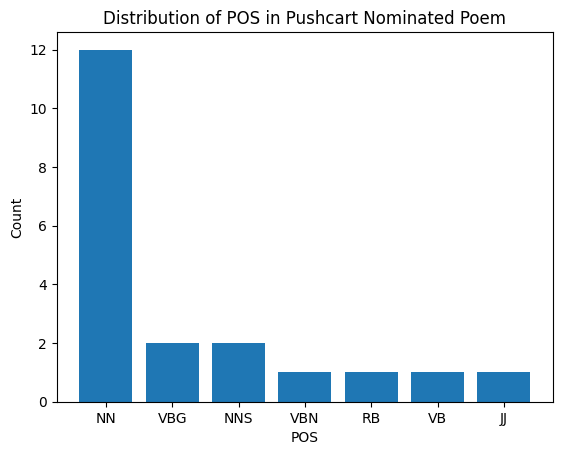

In [28]:
plot_dist_pos(data['dist_pos'][0])

In [29]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Author,Title,Poem,Poem_for_model,POS,dist_pos
0,2023,Christopher Hunter,"LOUISA, AGE 6, AT REST",Louisa alighting into placeAlways dazzles me.\...,louisa alighting into placealways dazzles me s...,"[[(louisa, NN)], [(alighting, VBG)], [(placeal...","{'NN': 12, 'VBG': 2, 'NNS': 2, 'VBN': 1, 'RB':..."
1,2023,Susan J Koch,SOFIA,I cannot disrememberthree carefree boysdraggin...,cannot disrememberthree carefree boysdragging ...,"[[(disrememberthree, NN)], [(carefree, NN)], [...",{'NN': 9}
2,2023,John Mitchell,NICHOLAS II,The ghost of the Tsar walks.He passes some Jew...,the ghost of the tsar walks he passes some jew...,"[[(ghost, NN)], [(tsar, NN)], [(walk, NN)], [(...","{'NN': 41, 'CD': 1, 'DT': 1, 'JJ': 5, 'VBG': 1..."
3,2023,Alise Palmer,BELTANE,"A boy green shouldered, growslike corn endless...",boy green shouldered growslike corn endlessly ...,"[[(boy, NN)], [(green, JJ)], [(shouldered, VBN...","{'NN': 28, 'JJ': 3, 'VBN': 3, 'RB': 1, 'VBG': ..."
4,2023,Rose Postma,ON TELLING MY MOTHER I AM PREGNANT AGAIN,"My mother, who spent the day after my birth tr...",my mother who spent the day after my birth try...,"[[(mother, NN)], [(spent, NN)], [(day, NN)], [...","{'NN': 56, 'VBG': 4, 'DT': 2, 'VBD': 3, 'CD': ..."


## 2.Compare the dist of POS in each poem

In [30]:
dist_pos(data['dist_pos'][i])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(['RB', 'NN', 'VBN', 'JJ', 'NNS', 'VBG', 'VBD'], [4, 48, 6, 6, 1, 2, 1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


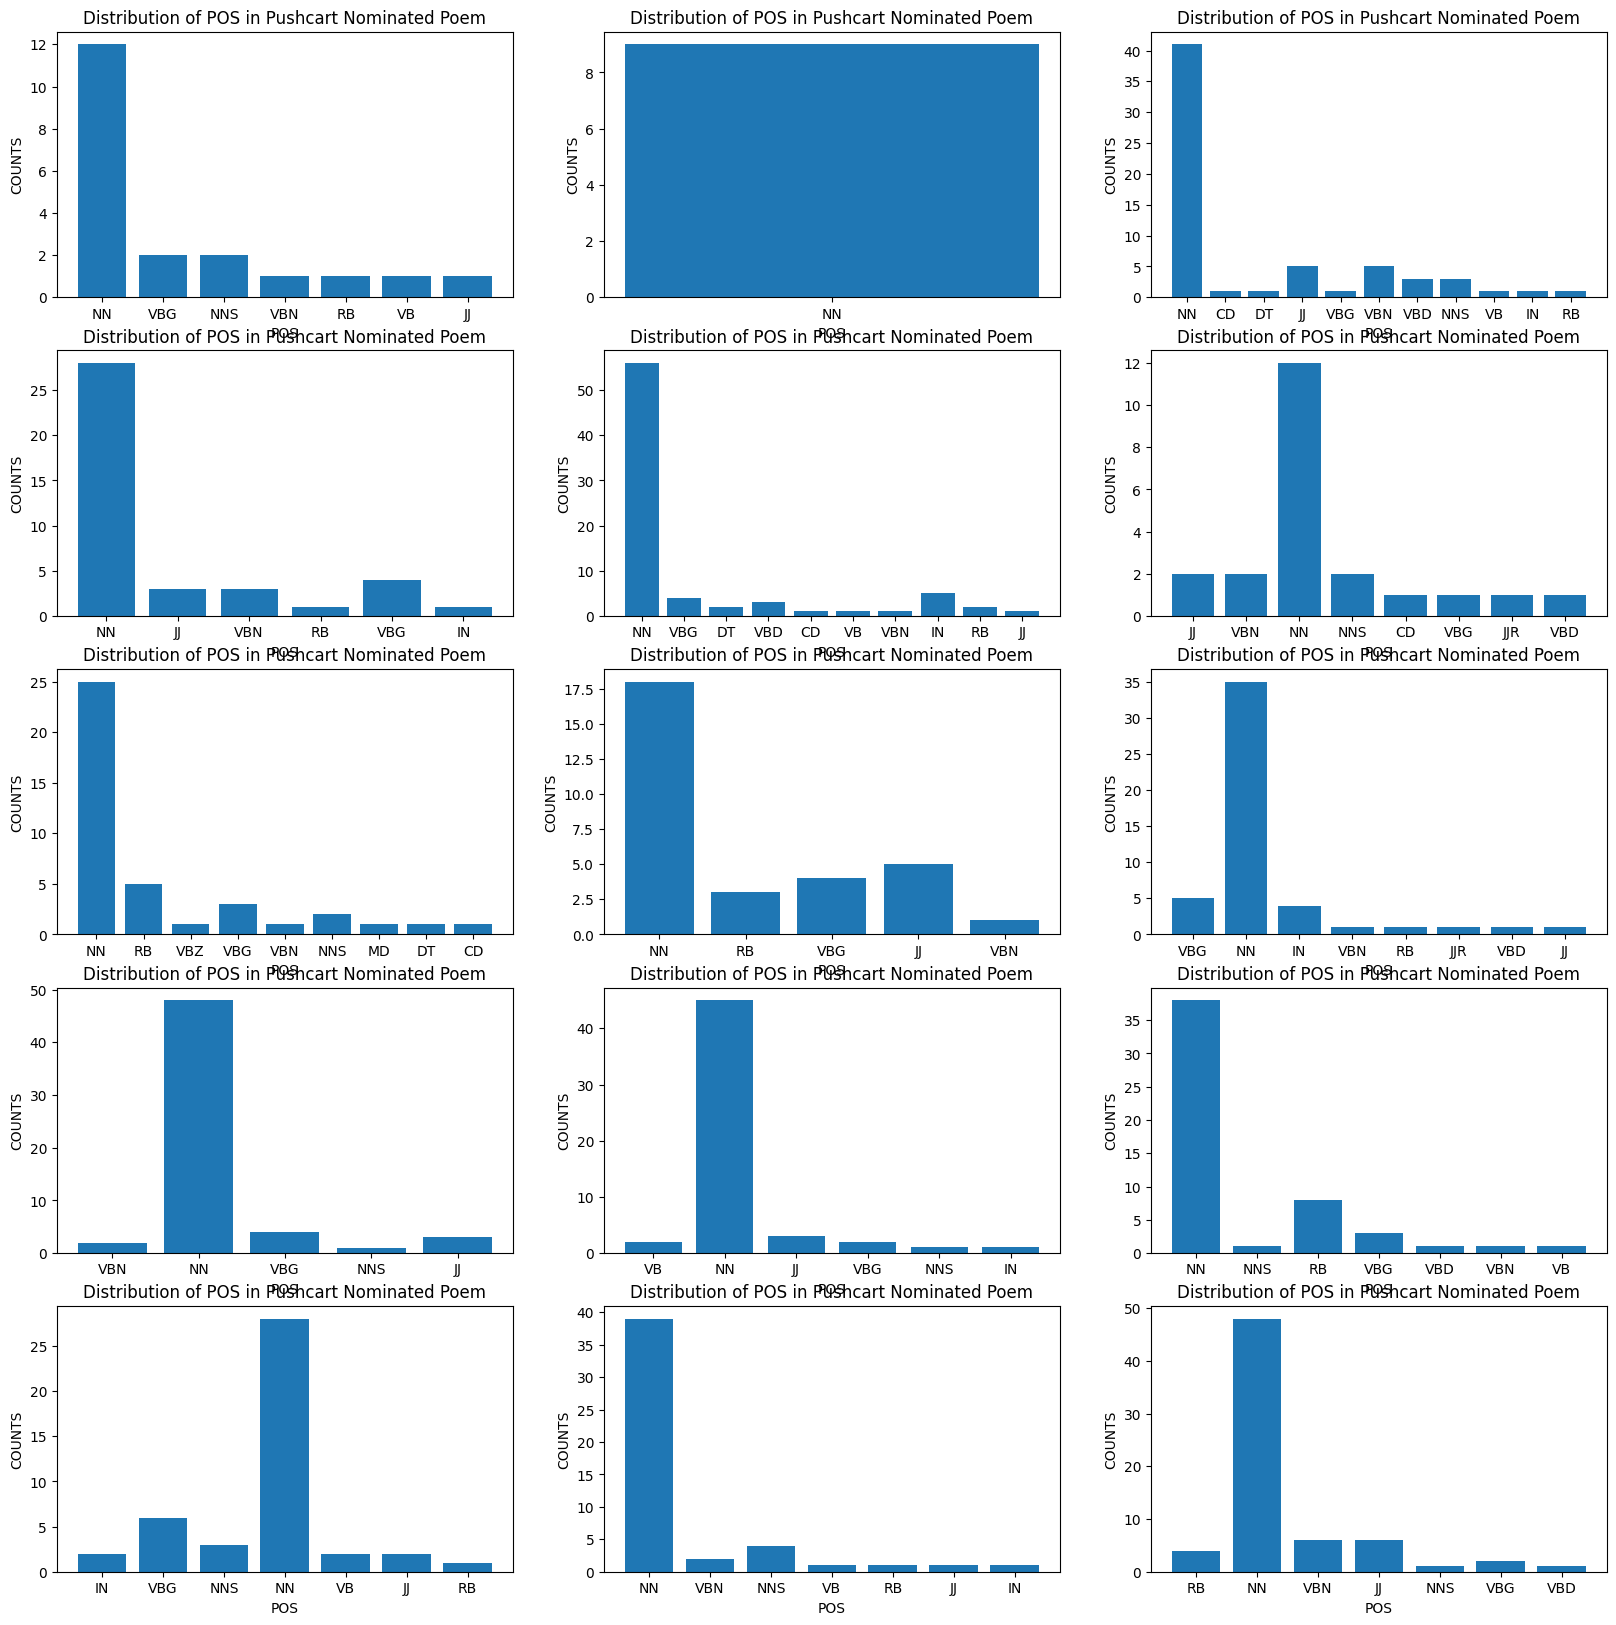

In [31]:
# Define the number of rows and columns for the plot grid
rows = 5
cols = 3

# Create the plot grid
fig, axs = plt.subplots(rows, cols, figsize=(20,20))

# Flatten the plot grid to access each subplot
axs = axs.flatten()

# Loop through the dataframe rows and plot the data points on each subplot
for i, row in data.iterrows():
    x = dist_pos(row['dist_pos'])
    axs[i].bar(x[0], x[1])

for i in range(len(axs)):
    axs[i].set_title(f"Distribution of POS in Pushcart Nominated Poem")
    axs[i].set_xlabel("POS")
    axs[i].set_ylabel("COUNTS")

plt.show()

In [32]:
for i, row in data.iterrows():
    x = row['dist_pos']
    y = dist_pos(x)
    print(y)

(['NN', 'VBG', 'NNS', 'VBN', 'RB', 'VB', 'JJ'], [12, 2, 2, 1, 1, 1, 1])
(['NN'], [9])
(['NN', 'CD', 'DT', 'JJ', 'VBG', 'VBN', 'VBD', 'NNS', 'VB', 'IN', 'RB'], [41, 1, 1, 5, 1, 5, 3, 3, 1, 1, 1])
(['NN', 'JJ', 'VBN', 'RB', 'VBG', 'IN'], [28, 3, 3, 1, 4, 1])
(['NN', 'VBG', 'DT', 'VBD', 'CD', 'VB', 'VBN', 'IN', 'RB', 'JJ'], [56, 4, 2, 3, 1, 1, 1, 5, 2, 1])
(['JJ', 'VBN', 'NN', 'NNS', 'CD', 'VBG', 'JJR', 'VBD'], [2, 2, 12, 2, 1, 1, 1, 1])
(['NN', 'RB', 'VBZ', 'VBG', 'VBN', 'NNS', 'MD', 'DT', 'CD'], [25, 5, 1, 3, 1, 2, 1, 1, 1])
(['NN', 'RB', 'VBG', 'JJ', 'VBN'], [18, 3, 4, 5, 1])
(['VBG', 'NN', 'IN', 'VBN', 'RB', 'JJR', 'VBD', 'JJ'], [5, 35, 4, 1, 1, 1, 1, 1])
(['VBN', 'NN', 'VBG', 'NNS', 'JJ'], [2, 48, 4, 1, 3])
(['VB', 'NN', 'JJ', 'VBG', 'NNS', 'IN'], [2, 45, 3, 2, 1, 1])
(['NN', 'NNS', 'RB', 'VBG', 'VBD', 'VBN', 'VB'], [38, 1, 8, 3, 1, 1, 1])
(['IN', 'VBG', 'NNS', 'NN', 'VB', 'JJ', 'RB'], [2, 6, 3, 28, 2, 2, 1])
(['NN', 'VBN', 'NNS', 'VB', 'RB', 'JJ', 'IN'], [39, 2, 4, 1, 1, 1, 1])
(['R

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
def buildPoemArray(data):
    poet = {}
    poems = list()
    for i in data:
        idx = "poem"+str(i) ##poem1
        poet[idx+"_title"] = data[i]["Title"] #poem1_title = tien
        poet[idx] = data[i]["Poem_for_model"] # poem
        poems.append(idx)
    poet['poems_array'] = poems
    return poet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
def extractAllPOS(poet):
    global_vrb = set()
    global_nns = set()
    global_adj = set()
    for key in poet['poems_array']:
        text = poet[key]
        word_list = word_tokenize(text)
        pos_value = nltk.pos_tag(word_list)
        poet["pos_"+key] = pos_value

        vrb = set([word for (word, pos) in pos_value if (pos.startswith('VB'))])
        nns = set([word for (word, pos) in pos_value if (pos.startswith('NN'))])
        adj = set([word for (word, pos) in pos_value if (pos.startswith('JJ'))])

        poet["verbs_"+key] = list(vrb)
        poet["nouns_"+key] = list(nns)
        poet["adjectives_"+key] = list(adj)

        global_vrb = set.union(global_vrb, vrb)
        global_nns = set.union(global_nns, nns)
        global_adj = set.union(global_adj, adj)

    poet["all_verbs"] = list(global_vrb)
    poet["all_nouns"] = list(global_nns)
    poet["all_adjectives"] = list(global_adj)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
def getPOS(file_name, df):
    pos = ""
    if os.path.exists(file_name):
        with open(file_name, 'r') as file:
            pos = json.load(file)
    else:
        pos = buildPoemArray(json.loads(df.to_json(orient="index")))
        extractAllPOS(pos)
        with open(file_name, 'w') as file:
            json.dump(pos, file)
    return pos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
file_name = store_loc + "Pushcart-Nomination.json"
pc_pos = getPOS(file_name, data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
def count_pos(tokens):
    pos_counts = nltk.FreqDist(tag for word, tag in nltk.pos_tag(tokens))
    return pos_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 3.Superimpose them on each other in terms of ratios of POS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


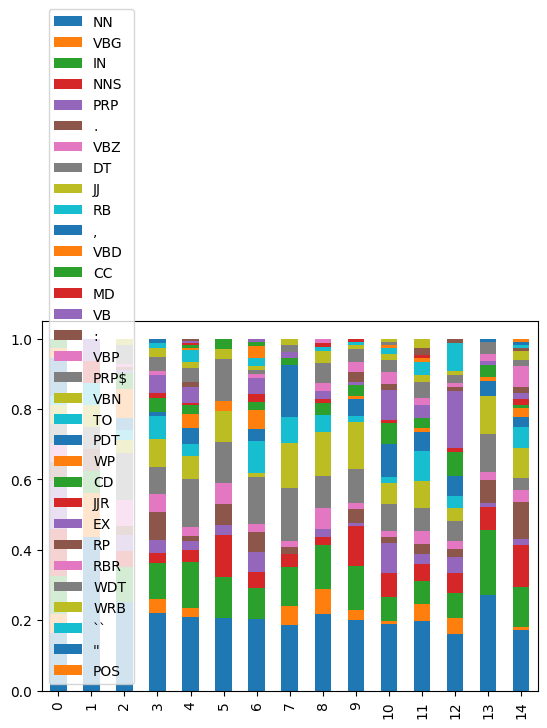

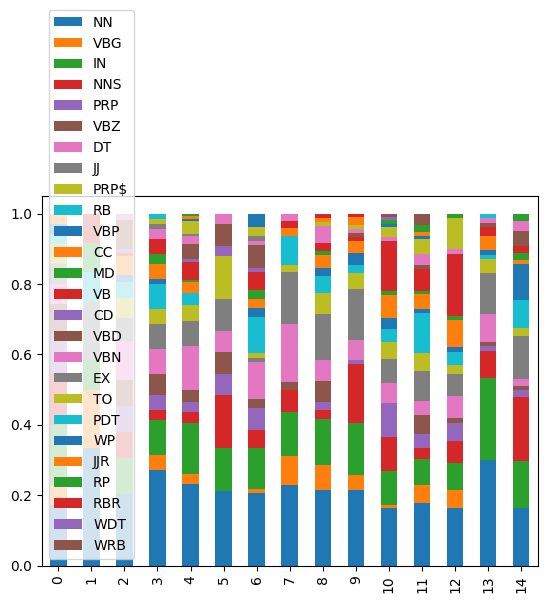

In [38]:
pos_data_n = []
for poem in poems_Nominated:
    tokens = nltk.word_tokenize(poem.lower())
    pos_counts_n = count_pos(tokens)
    pos_data_n.append(pos_counts_n)

# Combine POS counts into a DataFrame
pos_df_n = pd.DataFrame(pos_data_n)
pos_df_n.fillna(0, inplace=True)

# Normalize the counts to get proportions
pos_df_n = pos_df_n.div(pos_df_n.sum(axis=1), axis=0)

# Plot the data using a stacked bar chart
pos_df_n.plot(kind='bar', stacked=True)
plt.show()

pos_data_nn = []
for poem in poems:
    tokens = nltk.word_tokenize(poem.lower())
    pos_counts_nn = count_pos(tokens)
    pos_data_nn.append(pos_counts_nn)

# Combine POS counts into a DataFrame
pos_df_nn = pd.DataFrame(pos_data_nn)
pos_df_nn.fillna(0, inplace=True)

# Normalize the counts to get proportions
pos_df_nn = pos_df_nn.div(pos_df_nn.sum(axis=1), axis=0)

# Plot the data using a stacked bar chart
pos_df_nn.plot(kind='bar', stacked=True)
plt.show()

## 4.Gold/reference standard
 → What did the nominated poems have in common (common denominator)

In [39]:
for poem in poems_Nominated:
    print(poem)

Louisa alighting into placeAlways dazzles me.
She twists with surpassing graceInto an inverted curtsey.Her arms smoothly interlace,As she gets all topsy-turvy.Until, in sudden about-face,
She folds her knees,And flees.
I cannot disrememberthree carefree boysdragging a bear cubthrough Macedonia Square -a ring through itsbloodiednose.
The ghost of the Tsar walks.He passes some Jews and Gypsies.One curses him; another throws a rock.Bad angels fold their wings and watch.
Choirs sang at his birth,Armies moved at his command.God rang the bellsWhen he walked into cathedrals.But now he hears the noise from out the eastAnd sees the fire in the western sky.
Death crowned him at his birth,His cousins glittered throughout Europe.He seldom followed good adviceAnd did not ask permission.He lost a navy in a foreign seaAnd an army gone at Tannenberg,But still he played the emperor.Magnificence is blind and deaf,And death took all his dynasty.
A boy green shouldered, growslike corn endlessly and over n

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
import nltk
from collections import Counter

# Assuming you have already loaded the poems into the 'poems_Nominated' list

pos_counts_n = []
for poem in poems_Nominated:
    words_n = nltk.word_tokenize(poem)
    pos_tags_n = nltk.pos_tag(words_n)  # Fix variable name 'words_n'
    pos_counts_n.append(Counter([tag for word, tag in pos_tags_n]))  # Fix variable name 'pos_tags_n'

# Combine POS counts for all poems
total_counts_n = Counter()
for counts in pos_counts_n:
    total_counts_n += counts

# Calculate total number of words across all poems
total_words_n = sum(total_counts_n.values())

# Calculate proportion of each POS tag
pos_proportions_n = {tag: count / total_words_n for tag, count in total_counts_n.items()}

# Identify most common POS tags
most_common_n = total_counts_n.most_common(5)  # Top 5 most common tags

# Print results
print("Most common POS tags for Nominated Poems:")
for tag, count in most_common_n:
    print(f"{tag}: {count} ({pos_proportions_n[tag]:.2%})")


Most common POS tags for Nominated Poems:
NN: 245 (19.13%)
IN: 135 (10.54%)
DT: 122 (9.52%)
JJ: 88 (6.87%)
NNS: 75 (5.85%)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 5.Plot stats

In [41]:
print(most_common_n)

[('NN', 245), ('IN', 135), ('DT', 122), ('JJ', 88), ('NNS', 75)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
print(pos_proportions_n)

{'NNP': 0.02185792349726776, 'VBG': 0.02654176424668228, 'IN': 0.1053864168618267, 'NNS': 0.0585480093676815, 'PRP': 0.04371584699453552, '.': 0.03981264637002342, 'VBZ': 0.03434816549570648, 'NN': 0.1912568306010929, 'DT': 0.09523809523809523, 'JJ': 0.06869633099141297, 'RB': 0.04215456674473068, ',': 0.047619047619047616, 'VBD': 0.02419984387197502, 'CC': 0.03278688524590164, 'MD': 0.0078064012490242, 'VB': 0.03981264637002342, ':': 0.00858704137392662, 'VBP': 0.01873536299765808, 'PRP$': 0.03590944574551132, 'VBN': 0.01405152224824356, 'TO': 0.01795472287275566, 'PDT': 0.00156128024980484, 'WP': 0.00468384074941452, 'CD': 0.00234192037470726, 'JJR': 0.00312256049960968, 'EX': 0.00156128024980484, 'RP': 0.0039032006245121, 'RBR': 0.00078064012490242, 'WDT': 0.00078064012490242, 'WRB': 0.00312256049960968, '``': 0.00078064012490242, "''": 0.00078064012490242, 'NNPS': 0.00078064012490242, 'POS': 0.00078064012490242}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
sorted_pos_percentages_n = {k: v for k, v in sorted(pos_proportions_n.items(), key=lambda item: item[1], reverse=True)}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
for tag, count in most_common_n:
  sorted_pos_percentages_n = {k: v for k, v in sorted(pos_proportions_n.items(), key=lambda item: item[1], reverse=True)}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


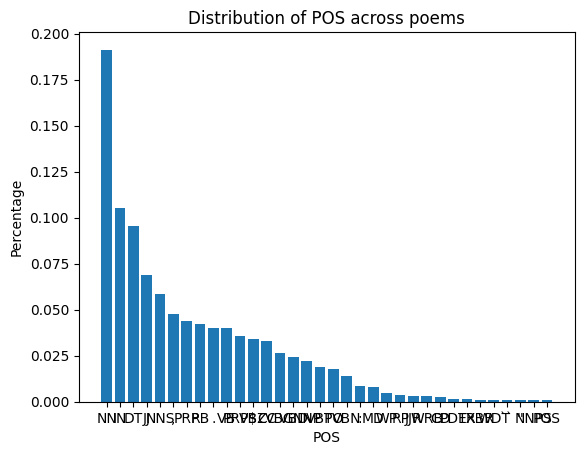

In [45]:
plt.bar(sorted_pos_percentages_n.keys(), sorted_pos_percentages_n.values())
plt.xlabel('POS')
plt.ylabel('Percentage')
plt.title('Distribution of POS across poems')
plt.show()

In [46]:
most_common_pos = {}
for tag, count in most_common_n:
  most_common_pos[tag] = pos_proportions_n[tag]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
print(most_common_pos)

{'NN': 0.1912568306010929, 'IN': 0.1053864168618267, 'DT': 0.09523809523809523, 'JJ': 0.06869633099141297, 'NNS': 0.0585480093676815}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


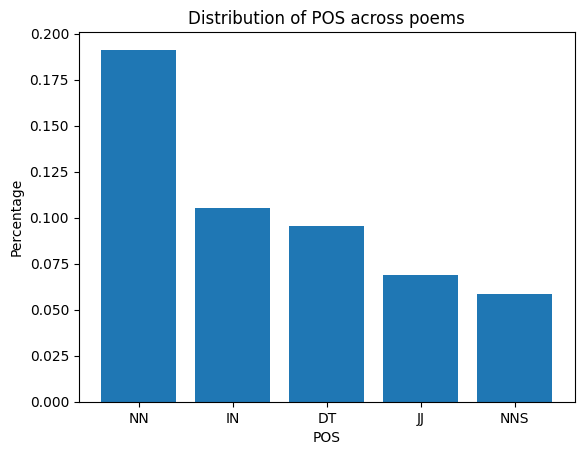

In [48]:
plt.bar(most_common_pos.keys(), most_common_pos.values())
plt.xlabel('POS')
plt.ylabel('Percentage')
plt.title('Distribution of POS across poems')
plt.show()

# B. Topic

Analyze topics for the prize winning poems of that year

In [49]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Author,Title,Poem,Poem_for_model,POS,dist_pos
0,2023,Christopher Hunter,"LOUISA, AGE 6, AT REST",Louisa alighting into placeAlways dazzles me.\...,louisa alighting into placealways dazzles me s...,"[[(louisa, NN)], [(alighting, VBG)], [(placeal...","{'NN': 12, 'VBG': 2, 'NNS': 2, 'VBN': 1, 'RB':..."
1,2023,Susan J Koch,SOFIA,I cannot disrememberthree carefree boysdraggin...,cannot disrememberthree carefree boysdragging ...,"[[(disrememberthree, NN)], [(carefree, NN)], [...",{'NN': 9}
2,2023,John Mitchell,NICHOLAS II,The ghost of the Tsar walks.He passes some Jew...,the ghost of the tsar walks he passes some jew...,"[[(ghost, NN)], [(tsar, NN)], [(walk, NN)], [(...","{'NN': 41, 'CD': 1, 'DT': 1, 'JJ': 5, 'VBG': 1..."
3,2023,Alise Palmer,BELTANE,"A boy green shouldered, growslike corn endless...",boy green shouldered growslike corn endlessly ...,"[[(boy, NN)], [(green, JJ)], [(shouldered, VBN...","{'NN': 28, 'JJ': 3, 'VBN': 3, 'RB': 1, 'VBG': ..."
4,2023,Rose Postma,ON TELLING MY MOTHER I AM PREGNANT AGAIN,"My mother, who spent the day after my birth tr...",my mother who spent the day after my birth try...,"[[(mother, NN)], [(spent, NN)], [(day, NN)], [...","{'NN': 56, 'VBG': 4, 'DT': 2, 'VBD': 3, 'CD': ..."


In [50]:
# Preprocess the poems
preprocessed_corpus = []
for poem in poems:
    # Tokenize the poem
    tokens = nltk.word_tokenize(poem)

    # Remove stop words and lemmatize words
    processed_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]

    # Add processed tokens to preprocessed_corpus
    preprocessed_corpus.append(processed_tokens)

# Create dictionary and bag-of-words representations of poems
dictionary = corpora.Dictionary(preprocessed_corpus)
bow_corpus = [dictionary.doc2bow(poem) for poem in preprocessed_corpus]

# Create the document-term matrix
dtm = corpora.MmCorpus.serialize('dtm_corpus.mm', bow_corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
 #Preprocess the poems
dictionary = corpora.Dictionary(preprocessed_corpus)
corpus = [dictionary.doc2bow(poem) for poem in preprocessed_corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
from gensim.models import LdaModel

# Train an LDA model on the document-term matrix
lda_model = LdaModel(dtm, num_topics=5, id2word=dictionary, passes=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
from gensim.models import CoherenceModel

# Compute the coherence score of the model
coherence_score = CoherenceModel(model=lda_model, texts=preprocessed_corpus, dictionary=dictionary, coherence='c_v').get_coherence()

print(f"Coherence Score: {coherence_score}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.7028749760880012


In [54]:
for topic_num, topic_words in lda_model.show_topics(num_topics=-1, num_words=10):
    print(f"Topic {topic_num+1}: {topic_words}")

Topic 1: 0.002*"allow" + 0.002*"foot" + 0.002*"throughout" + 0.002*"sang" + 0.002*"iowa" + 0.002*"flameson" + 0.002*"praying" + 0.002*"see" + 0.002*"darkness" + 0.002*"giving"
Topic 2: 0.002*"clean" + 0.002*"even" + 0.002*"flameson" + 0.002*"become" + 0.002*"took" + 0.002*"breasteyes" + 0.002*"stream" + 0.002*"slower" + 0.002*"foodto" + 0.002*"suet"
Topic 3: 0.002*"choir" + 0.002*"ball" + 0.002*"corn" + 0.002*"father" + 0.002*"snifter" + 0.002*"macedonia" + 0.002*"fall" + 0.002*"itsbloodiednose" + 0.002*"placealways" + 0.002*"tiptoe"
Topic 4: 0.002*"hand" + 0.002*"inacceptance" + 0.002*"learnto" + 0.002*"face" + 0.002*"headto" + 0.002*"wickor" + 0.002*"went" + 0.002*"snow" + 0.002*"hears" + 0.002*"darkness"
Topic 5: 0.002*"flameson" + 0.002*"asks" + 0.002*"handsand" + 0.002*"try" + 0.002*"star" + 0.002*"keep" + 0.002*"majestic" + 0.002*"wrapped" + 0.002*"reveal" + 0.002*"cingulate"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
preprocessed_corpus = []
    # Tokenize the poem
tokens = nltk.word_tokenize(data['Poem_for_model'][0])

    # Remove stop words and lemmatize words
processed_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]

    # Add processed tokens to preprocessed_corpus
preprocessed_corpus.append(processed_tokens)

# Create dictionary and bag-of-words representations of poems
dictionary = corpora.Dictionary(preprocessed_corpus)
bow_corpus = [dictionary.doc2bow(poem) for poem in preprocessed_corpus]

# Create the document-term matrix
dtm_p1 = corpora.MmCorpus.serialize('dtm_corpus.mm', bow_corpus)

lda_model_p1 = LdaModel(dtm_p1, num_topics=5, id2word=dictionary, passes=10)

coherence_score_p1 = CoherenceModel(model=lda_model_p1, texts=preprocessed_corpus, dictionary=dictionary, coherence='c_v').get_coherence()

print(f"Coherence Score: {coherence_score}")

for topic_num, topic_words in lda_model_p1.show_topics(num_topics=-1, num_words=10):
    print(f"Topic {topic_num+1}: {topic_words}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.7028749760880012
Topic 1: 0.059*"twist" + 0.059*"turvy" + 0.058*"louisa" + 0.057*"arm" + 0.054*"smoothly" + 0.054*"flees" + 0.053*"alighting" + 0.052*"fold" + 0.050*"get" + 0.050*"dazzle"
Topic 2: 0.058*"flees" + 0.058*"interlace" + 0.054*"dazzle" + 0.054*"get" + 0.052*"louisa" + 0.052*"inverted" + 0.052*"topsy" + 0.051*"sudden" + 0.051*"fold" + 0.051*"face"
Topic 3: 0.061*"inverted" + 0.057*"curtsey" + 0.054*"louisa" + 0.054*"alighting" + 0.054*"topsy" + 0.054*"get" + 0.053*"turvy" + 0.051*"placealways" + 0.051*"surpassing" + 0.050*"interlace"
Topic 4: 0.059*"topsy" + 0.056*"arm" + 0.056*"graceinto" + 0.055*"interlace" + 0.055*"alighting" + 0.054*"dazzle" + 0.053*"get" + 0.050*"turvy" + 0.050*"smoothly" + 0.050*"knee"
Topic 5: 0.059*"fold" + 0.058*"sudden" + 0.057*"flees" + 0.057*"interlace" + 0.054*"topsy" + 0.053*"face" + 0.051*"curtsey" + 0.050*"louisa" + 0.050*"alighting" + 0.050*"get"


In [56]:
def topic_model(poem):
  vectorizer = CountVectorizer()
  doc_term_matrix = vectorizer.fit_transform(poem)
  lda_model = LatentDirichletAllocation(n_components=5, random_state=0)
  lda_model.fit(doc_term_matrix)
  for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}: {' '.join([vectorizer.get_feature_names()[index] for index in topic.argsort()[:-11:-1]])}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
def docterm_matrix(poem):
  poem = poem.translate(str.maketrans('', '', string.punctuation))
  print(poem)
  poem = poem.lower()
  words = word_tokenize(poem)
  stop_words = set(stopwords.words('english'))
  words = [word for word in words if word not in stop_words]
  vectorizer = CountVectorizer()
  doc_term_matrix = vectorizer.fit_transform([' '.join(words)])
  return doc_term_matrix.toarray()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
data['doc_term_matrix'] = 4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# C. Sentiment Analysis

## 1.Analyze sentiments for the prize winning poems of that year

In [59]:
poem1 = data['Poem_for_model'][0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
data['sentiment'] = {}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
def check_sentiment(poem):
  sid = SentimentIntensityAnalyzer()
  scores = sid.polarity_scores(poem)
  return scores

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
nltk.download('vader_lexicon')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [63]:
for i in range(len(data)):
  poem = data['Poem_for_model'][i]
  data['sentiment'][i] = check_sentiment(poem)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Author,Title,Poem,Poem_for_model,POS,dist_pos,doc_term_matrix,sentiment
0,2023,Christopher Hunter,"LOUISA, AGE 6, AT REST",Louisa alighting into placeAlways dazzles me.\...,louisa alighting into placealways dazzles me s...,"[[(louisa, NN)], [(alighting, VBG)], [(placeal...","{'NN': 12, 'VBG': 2, 'NNS': 2, 'VBN': 1, 'RB':...",4,"{'neg': 0.048, 'neu': 0.952, 'pos': 0.0, 'comp..."
1,2023,Susan J Koch,SOFIA,I cannot disrememberthree carefree boysdraggin...,cannot disrememberthree carefree boysdragging ...,"[[(disrememberthree, NN)], [(carefree, NN)], [...",{'NN': 9},4,"{'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'comp..."
2,2023,John Mitchell,NICHOLAS II,The ghost of the Tsar walks.He passes some Jew...,the ghost of the tsar walks he passes some jew...,"[[(ghost, NN)], [(tsar, NN)], [(walk, NN)], [(...","{'NN': 41, 'CD': 1, 'DT': 1, 'JJ': 5, 'VBG': 1...",4,"{'neg': 0.204, 'neu': 0.726, 'pos': 0.069, 'co..."
3,2023,Alise Palmer,BELTANE,"A boy green shouldered, growslike corn endless...",boy green shouldered growslike corn endlessly ...,"[[(boy, NN)], [(green, JJ)], [(shouldered, VBN...","{'NN': 28, 'JJ': 3, 'VBN': 3, 'RB': 1, 'VBG': ...",4,"{'neg': 0.056, 'neu': 0.839, 'pos': 0.105, 'co..."
4,2023,Rose Postma,ON TELLING MY MOTHER I AM PREGNANT AGAIN,"My mother, who spent the day after my birth tr...",my mother who spent the day after my birth try...,"[[(mother, NN)], [(spent, NN)], [(day, NN)], [...","{'NN': 56, 'VBG': 4, 'DT': 2, 'VBD': 3, 'CD': ...",4,"{'neg': 0.108, 'neu': 0.75, 'pos': 0.142, 'com..."


In [65]:
def plot_dist_sentiment(dict):
  senti = list(dict.keys())
  counts = list(dict.values())

  # Create a bar plot
  plt.bar(senti, counts)
  plt.xlabel('Sentiment')
  plt.ylabel('Count')
  plt.title('Distribution of Sentiments in Pushcart NOminated Poem')
  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


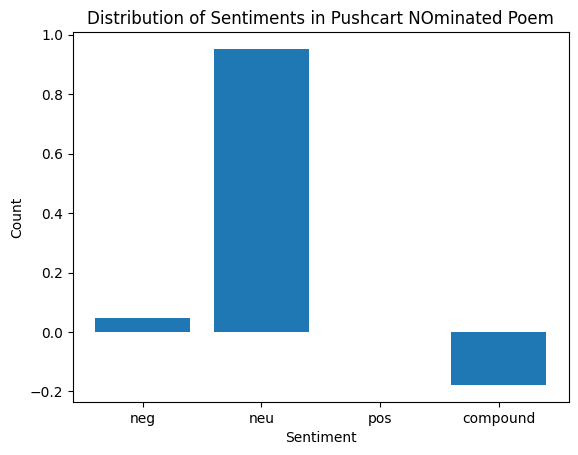

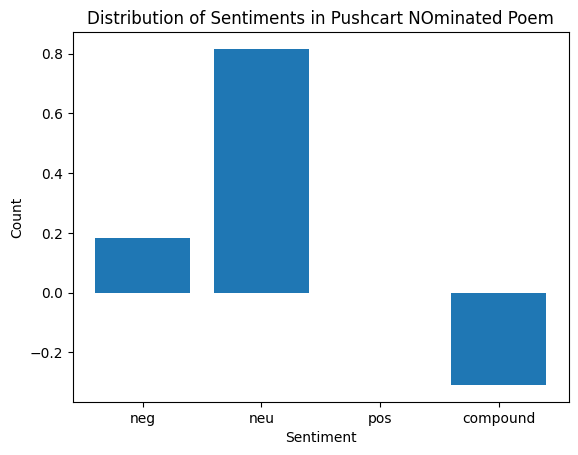

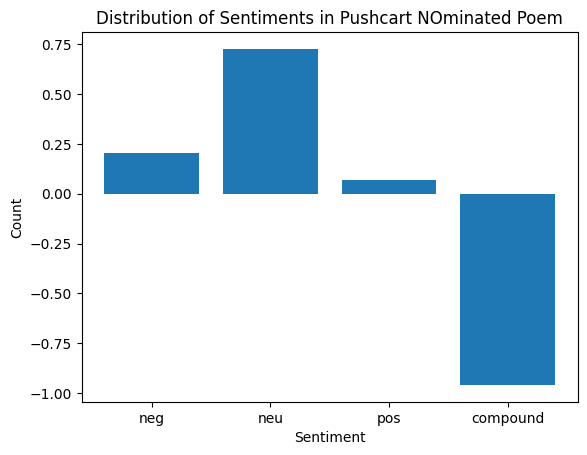

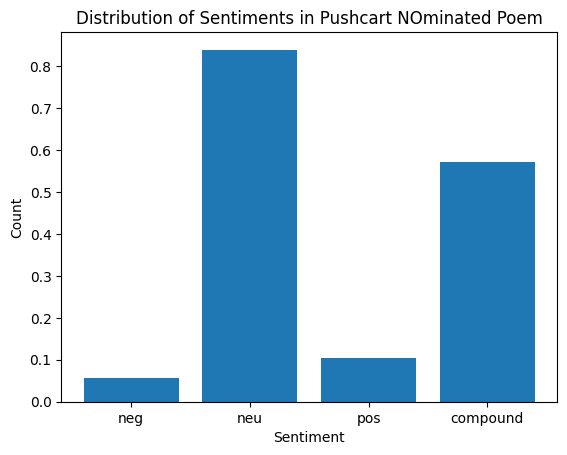

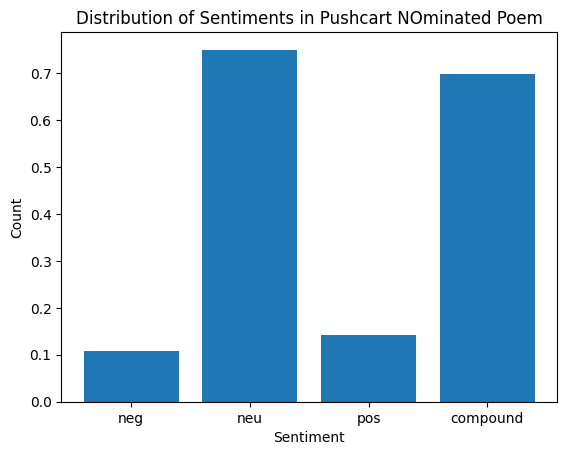

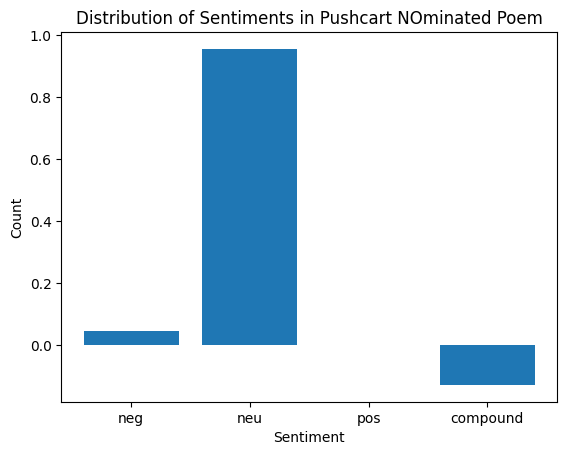

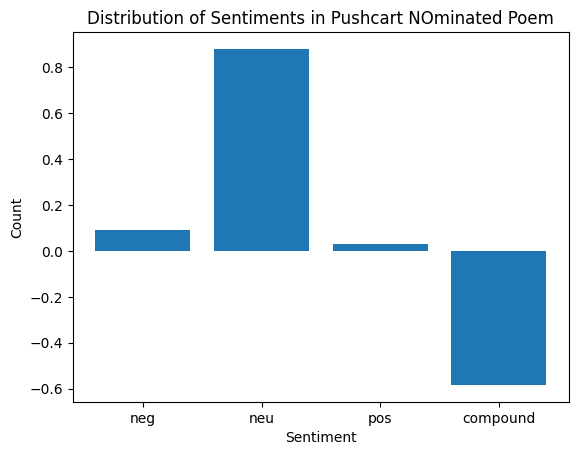

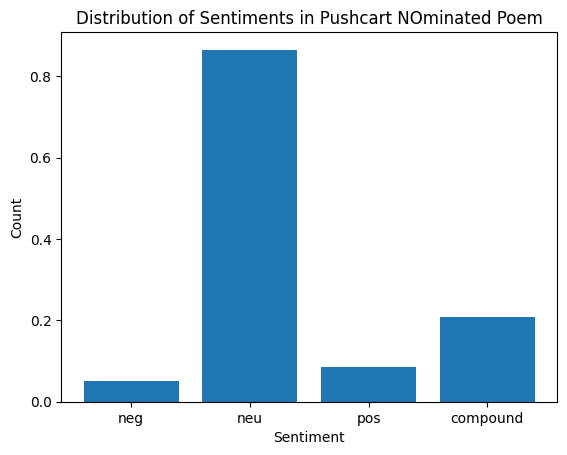

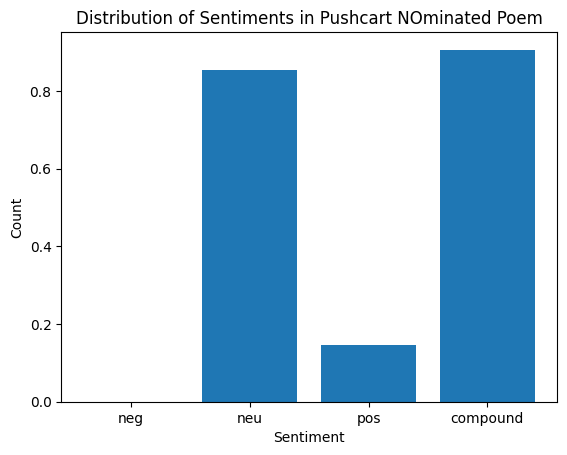

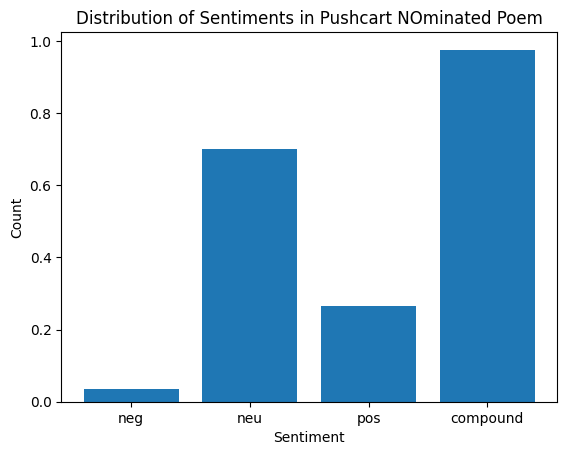

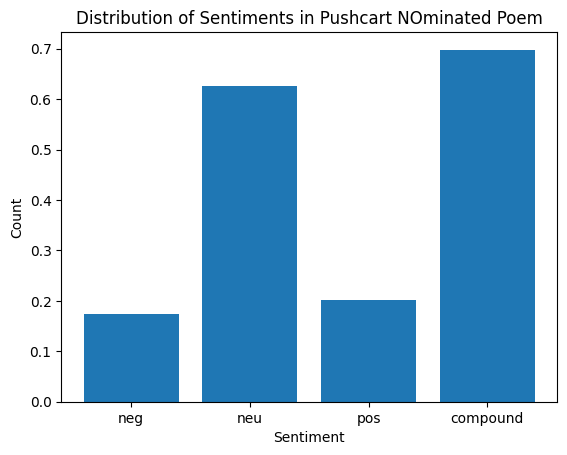

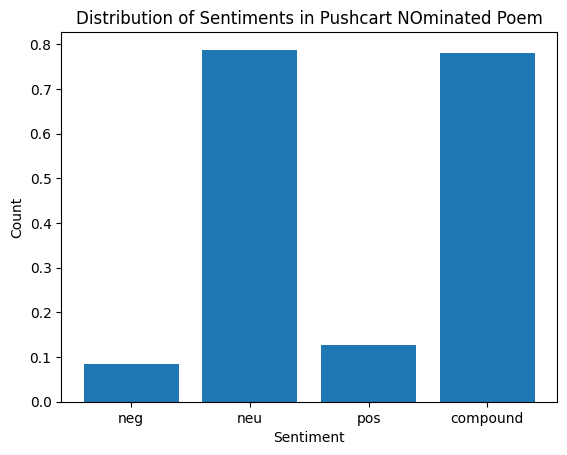

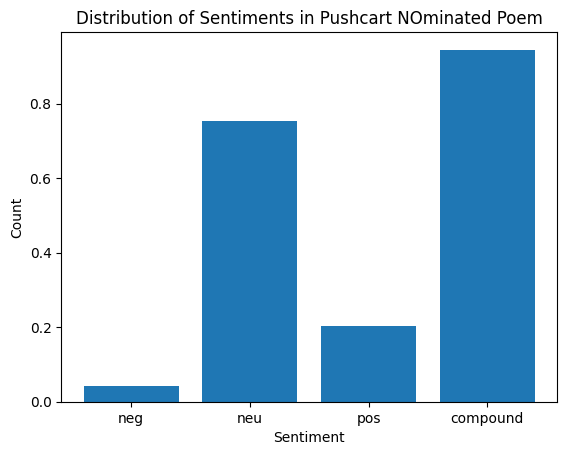

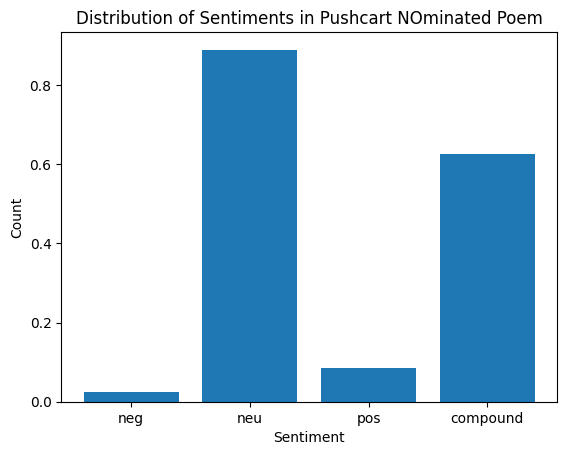

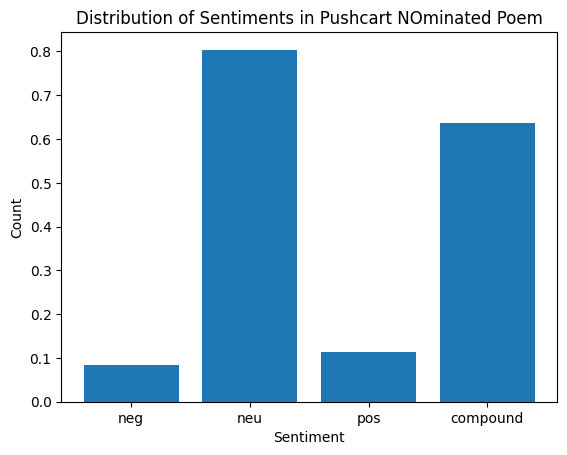

In [66]:
for i in range(len(data)):
  plot_dist_sentiment(data['sentiment'][i])

In [67]:
# Define the full file path
json_file_path = os.path.join(store_loc, "Pushcart_Nomination.json")

# Save the DataFrame to the JSON file
data.to_json(json_file_path, orient='records', lines=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
poems_n = data = pd.read_json(json_file_path, lines=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
poems_n

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Author,Title,Poem,Poem_for_model,POS,dist_pos,doc_term_matrix,sentiment
0,2023,Christopher Hunter,"LOUISA, AGE 6, AT REST",Louisa alighting into placeAlways dazzles me.\...,louisa alighting into placealways dazzles me s...,"[[[louisa, NN]], [[alighting, VBG]], [[placeal...","{'NN': 12, 'VBG': 2, 'NNS': 2, 'VBN': 1, 'RB':...",4,"{'neg': 0.048, 'neu': 0.9520000000000001, 'pos..."
1,2023,Susan J Koch,SOFIA,I cannot disrememberthree carefree boysdraggin...,cannot disrememberthree carefree boysdragging ...,"[[[disrememberthree, NN]], [[carefree, NN]], [...",{'NN': 9},4,"{'neg': 0.184, 'neu': 0.8160000000000001, 'pos..."
2,2023,John Mitchell,NICHOLAS II,The ghost of the Tsar walks.He passes some Jew...,the ghost of the tsar walks he passes some jew...,"[[[ghost, NN]], [[tsar, NN]], [[walk, NN]], [[...","{'NN': 41, 'CD': 1, 'DT': 1, 'JJ': 5, 'VBG': 1...",4,"{'neg': 0.20400000000000001, 'neu': 0.726, 'po..."
3,2023,Alise Palmer,BELTANE,"A boy green shouldered, growslike corn endless...",boy green shouldered growslike corn endlessly ...,"[[[boy, NN]], [[green, JJ]], [[shouldered, VBN...","{'NN': 28, 'JJ': 3, 'VBN': 3, 'RB': 1, 'VBG': ...",4,"{'neg': 0.056, 'neu': 0.839, 'pos': 0.105, 'co..."
4,2023,Rose Postma,ON TELLING MY MOTHER I AM PREGNANT AGAIN,"My mother, who spent the day after my birth tr...",my mother who spent the day after my birth try...,"[[[mother, NN]], [[spent, NN]], [[day, NN]], [...","{'NN': 56, 'VBG': 4, 'DT': 2, 'VBD': 3, 'CD': ...",4,"{'neg': 0.108, 'neu': 0.75, 'pos': 0.142000000..."
5,2022,Phoebe Bubendorfer,OIL SPILL,A red-throated loonmired in a slick of oilstra...,red throated loonmired in slick of oilstrains ...,"[[[red, JJ]], [[throated, VBN]], [[loonmired, ...","{'JJ': 2, 'VBN': 2, 'NN': 12, 'NNS': 2, 'CD': ...",4,"{'neg': 0.045, 'neu': 0.9550000000000001, 'pos..."
6,2022,Bill Graeser,THE BURNING OF THE WHALES,Fire never seems to mindwhether it's the curl ...,fire never seems to mindwhether it is the curl...,"[[[fire, NN]], [[never, RB]], [[seems, VBZ]], ...","{'NN': 25, 'RB': 5, 'VBZ': 1, 'VBG': 3, 'VBN':...",4,"{'neg': 0.089, 'neu': 0.88, 'pos': 0.032, 'com..."
7,2022,John Mitchell,THE BUFFALO,The buffalo stands still in the wind.Staring a...,the buffalo stands still in the wind staring a...,"[[[buffalo, NN]], [[stand, NN]], [[still, RB]]...","{'NN': 18, 'RB': 3, 'VBG': 4, 'JJ': 5, 'VBN': 1}",4,"{'neg': 0.05, 'neu': 0.865, 'pos': 0.085, 'com..."
8,2022,Lily Nelson,FEVER,You are nineLying on the front room couchAnd t...,you are ninelying on the front room couchand t...,"[[[ninelying, VBG]], [[front, NN]], [[room, NN...","{'VBG': 5, 'NN': 35, 'IN': 4, 'VBN': 1, 'RB': ...",4,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp..."
9,2022,Lucille Morgan Wilson,LISTENING TO DVORAK'S HUMORESQUE,The fingered notes play up and down my spineli...,the fingered notes play up and down my spineli...,"[[[fingered, VBN]], [[note, NN]], [[play, NN]]...","{'VBN': 2, 'NN': 48, 'VBG': 4, 'NNS': 1, 'JJ': 3}",4,"{'neg': 0.035, 'neu': 0.7010000000000001, 'pos..."


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Non-Nominated Poems

In [70]:
store_location = "/content/drive/MyDrive/Non-Pushcart/"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
data_df=pd.read_csv('/content/drive/MyDrive/Non-Pushcart/Pushcart_Non-nominated.csv', encoding='cp1252')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
data_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Author,Title,Poem
0,2023,Lexi Pelle,DIET COKE,All I saw my mother drink \nfor years. In the ...
1,2022,Nianxi Chen,JUNE IS ALMOST DONE,"June is almost done. In all of June,\nI didn’t..."
2,2021,Danusha Laméris,APPOINTMENT,"I’m leaned back on the table, the nurse strapp..."
3,2021,Jinendra Jain,THOSE DAYS,You can take all the rusting gold I secreted a...
4,2022,Ting Li,A LITTLE FLOWER,A little flower doesn’t know how beautiful she...


In [73]:
data_df['Poem'][1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'June is almost done. In all of June,\nI didn’t finish a single thing.\nFather is in bed,\nsmaller and smaller, day by day.\nThe time left to him by the world\nisn’t much.\nAnd how much is left to me?\nI visit him three times per day,\nnothing more than ten steps looking at five.\nThe south-facing window is always open.\nFather crafted the wood lattice when he was a young man.\nLast night, he awoke from a coma,\nsuddenly told Mother: When I’m gone,\nbury me with my carpenter ax.\nJune is almost done. Cornstalks in the field\nare as tall as a man.\nThe empty mountain is filled with cicada sounds.\nOnly newcomers comfort the leave-takers.\nOnly time receives the world’s enlightenment.'

Extracting All POS from each Poem and putting it under POS column in df

In [74]:
data_df['Poem_for_model'] = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
for i in range(len(data_df)):
  data_df['Poem_for_model'][i] = clean_txt(data_df['Poem'][i])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
print(data_df['Poem'][3])

You can take all the rusting gold I secreted away,
for those monsoons until childhood slipped away;
those petrichor smells, flooded lanes,
and paper-boats that floated away;
those long power-cuts, roof-top cots,
and sultry summer nights chatted away;
those last-row wooden-benches we fought for,
and the whispers when teachers looked away;
those childhood vows of togetherness, JJ,
and the smiling faces that have faded away.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
print(data_df['Poem_for_model'][3])

you can take all the rusting gold secreted away for those monsoons until childhood slipped away those petrichor smells flooded lanes and paper boats that floated away those long power cuts roof top cots and sultry summer nights chatted away those last row wooden benches we fought for and the whispers when teachers looked away those childhood vows of togetherness jj and the smiling faces that have faded away


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
poems_list = data_df['Poem_for_model'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
data_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Author,Title,Poem,Poem_for_model
0,2023,Lexi Pelle,DIET COKE,All I saw my mother drink \nfor years. In the ...,all saw my mother drink for years in the diner...
1,2022,Nianxi Chen,JUNE IS ALMOST DONE,"June is almost done. In all of June,\nI didn’t...",june is almost done in all of june did not fin...
2,2021,Danusha Laméris,APPOINTMENT,"I’m leaned back on the table, the nurse strapp...",am leaned back on the table the nurse strappin...
3,2021,Jinendra Jain,THOSE DAYS,You can take all the rusting gold I secreted a...,you can take all the rusting gold secreted awa...
4,2022,Ting Li,A LITTLE FLOWER,A little flower doesn’t know how beautiful she...,little flower does not know how beautiful she ...
5,2023,Karan Kapoor,PORTRAIT OF THE FATHER AS AN ALCOHOLIC,The first thing I notice about him\nis the exp...,the first thing notice about him is the expres...
6,2023,Pella Winkopp,UNDERWATER LAKES,there is a stillness in me that refuses to be ...,there is stillness in me that refuses to be tr...
7,2021,Srinivas Mandavilli,RAIN,"We lay together on a charpoy, the thrum on asb...",we lay together on charpoy the thrum on asbest...
8,2022,Max Sessner,ONE DAY,Everything comes back to haunt us\none day the...,everything comes back to haunt us one day the ...
9,2023,M,SALT,In this room down a hall\nat the Hopewell Hous...,in this room down hall at the hopewell house e...


In [80]:
selected_rows = data_df[['Year', 'Author', 'Title', 'Poem']]

selected_rows_array = selected_rows.to_dict(orient='records')

print(selected_rows_array)

[{'Year': 2023, 'Author': 'Lexi Pelle', 'Title': 'DIET COKE', 'Poem': 'All I saw my mother drink \nfor years. In the diner, served \nwith a striped straw and shredded\npaper beanie or sometimes \nat Stop & Shop just before checkout, \nits perfect plastic body pulled from \nthe squat fridge that sits underneath \nthe conveyor belt—but most often \nsipped from a silver can on the porch. \nShe never asked for ice. Never dared \nto dilute the fizzy pollution of artificial \nsweeteners. The first time I tried it \nI thought it tasted like a backhanded \ncompliment, surprisingly good, \nthe dark dizzying lake like a cactus \nburped Splenda into my mouth. \nThe flavor so far from milk or juice, \nlike a fresh-squeezed robot, a supermodel’s \nsaliva. My sister and I sat around her \nlike the students of Socrates and watched her \nsuccumb to the only sweetness she ever allowed\nherself. A true mother, listening \nto the questions it spat into the air,\nvoice lifted at the end of every swallowed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
# List to store poem data in JSON format
data_NN_json = []

# Iterate through the poem data and create JSON objects
for poem_data in selected_rows_array:
    print(poem_data)
    poem_json = {
        "Year": poem_data["Year"],
        "Author": poem_data["Author"],
        "Title": poem_data["Title"],
        "Poem": poem_data["Poem"]
    }
    data_NN_json.append(poem_json)

# Save the JSON data to a file
file_path_json = os.path.join(store_location, "NonPushcart_Nominations.json")
with open(file_path_json, 'w', encoding='utf-8') as jsonfile:
    json.dump(data_NN_json, jsonfile, ensure_ascii=False, indent=4)

print(f"JSON file saved successfully at {file_path_json}")

{'Year': 2023, 'Author': 'Lexi Pelle', 'Title': 'DIET COKE', 'Poem': 'All I saw my mother drink \nfor years. In the diner, served \nwith a striped straw and shredded\npaper beanie or sometimes \nat Stop & Shop just before checkout, \nits perfect plastic body pulled from \nthe squat fridge that sits underneath \nthe conveyor belt—but most often \nsipped from a silver can on the porch. \nShe never asked for ice. Never dared \nto dilute the fizzy pollution of artificial \nsweeteners. The first time I tried it \nI thought it tasted like a backhanded \ncompliment, surprisingly good, \nthe dark dizzying lake like a cactus \nburped Splenda into my mouth. \nThe flavor so far from milk or juice, \nlike a fresh-squeezed robot, a supermodel’s \nsaliva. My sister and I sat around her \nlike the students of Socrates and watched her \nsuccumb to the only sweetness she ever allowed\nherself. A true mother, listening \nto the questions it spat into the air,\nvoice lifted at the end of every swallowed\

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
poems_Non_Nominated = [poem["Poem"] for poem in data_NN_json]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
print(poems_list)

['all saw my mother drink for years in the diner served with striped straw and shredded paper beanie or sometimes at stop shop just before checkout its perfect plastic body pulled from the squat fridge that sits underneath the conveyor belt—but most often sipped from silver can on the porch she never asked for ice never dared to dilute the fizzy pollution of artificial sweeteners the first time tried it thought it tasted like backhanded compliment surprisingly good the dark dizzying lake like cactus burped splenda into my mouth the flavor so far from milk or juice like fresh squeezed robot supermodel’s saliva my sister and sat around her like the students of socrates and watched her succumb to the only sweetness she ever allowed herself true mother listening to the questions it spat into the air voice lifted at the end of every swallowed sentence let us play the quiet game she suggested on long car trips to hershey or to one of kate’s soccer tournaments and only then could we all hear 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
data_df['POS'] = 2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
# Load stop words and lemmatizer
stop_words_nn = set(stopwords.words('english'))
lemmatizer_nn = WordNetLemmatizer()

# Preprocess the poems
preprocessed_corpus = []
for i in range(len(data_df)):
    # Tokenize the poem
    tokens = nltk.word_tokenize(data_df['Poem_for_model'][i])

    # Remove stop words and lemmatize words
    processed_tokens = [lemmatizer_nn.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words_nn]

    words = [nltk.word_tokenize(processed_token) for processed_token in processed_tokens]

    # Tag the parts of speech for each word
    data_df['POS'][i] = [nltk.pos_tag(word) for word in words]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
data_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Author,Title,Poem,Poem_for_model,POS
0,2023,Lexi Pelle,DIET COKE,All I saw my mother drink \nfor years. In the ...,all saw my mother drink for years in the diner...,"[[(saw, NN)], [(mother, NN)], [(drink, NN)], [..."
1,2022,Nianxi Chen,JUNE IS ALMOST DONE,"June is almost done. In all of June,\nI didn’t...",june is almost done in all of june did not fin...,"[[(june, NN)], [(almost, RB)], [(done, VBN)], ..."
2,2021,Danusha Laméris,APPOINTMENT,"I’m leaned back on the table, the nurse strapp...",am leaned back on the table the nurse strappin...,"[[(leaned, VBN)], [(back, RB)], [(table, NN)],..."
3,2021,Jinendra Jain,THOSE DAYS,You can take all the rusting gold I secreted a...,you can take all the rusting gold secreted awa...,"[[(take, VB)], [(rusting, VBG)], [(gold, NN)],..."
4,2022,Ting Li,A LITTLE FLOWER,A little flower doesn’t know how beautiful she...,little flower does not know how beautiful she ...,"[[(little, JJ)], [(flower, NN)], [(know, VB)],..."


In [87]:
data_df['dist_pos'] = 3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# A. Stats

## 1.Plots: distributions of POS [n, v. adj, adv]

In [88]:
for poem in poems_list :
  sentences = nltk.sent_tokenize(poem)
  words = [nltk.word_tokenize(sentence) for sentence in sentences]
  pos_tags = [nltk.pos_tag(word) for word in words]

print(pos_tags)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('in', 'IN'), ('this', 'DT'), ('room', 'NN'), ('down', 'RB'), ('hall', 'NN'), ('at', 'IN'), ('the', 'DT'), ('hopewell', 'NN'), ('house', 'NN'), ('every', 'DT'), ('wednesday', 'NN'), ('from', 'IN'), ('30', 'CD'), ('to', 'TO'), ('00', 'CD'), ('the', 'DT'), ('widowed', 'VBN'), ('have', 'VBP'), ('agreed', 'VBN'), ('to', 'TO'), ('meet', 'VB'), ('to', 'TO'), ('lick', 'VB'), ('the', 'DT'), ('salt', 'NN'), ('block', 'NN'), ('my', 'PRP$'), ('name', 'NN'), ('tag', 'NN'), ('reads', 'VBZ'), ('albino', 'RB'), ('deer', 'JJ'), ('recessive', 'JJ'), ('rarity', 'NN'), ('widow', 'NN'), ('at', 'IN'), ('35', 'CD'), ('dun', 'NN'), ('colored', 'VBD'), ('helen', 'NNS'), ('and', 'CC'), ('marie', 'NNS'), ('mistake', 'VBP'), ('me', 'PRP'), ('for', 'IN'), ('sheep', 'NN'), ('or', 'CC'), ('goat', 'NN'), ('as', 'IN'), ('we', 'PRP'), ('draw', 'VBP'), ('our', 'PRP$'), ('chairs', 'NNS'), ('into', 'IN'), ('circle', 'NN'), ('of', 'IN'), ('circumstance', 'NN'), ('muscles', 'NNS'), ('in', 'IN'), ('their', 'PRP$'), ('aged

In [89]:
def count_pos(array):
  ''' this method is to go through POS array and then count each POS type
      you just have to call this function in one for loop like below cell
  '''
  pos_counts = collections.defaultdict(int)
  pos_counts.clear()
  for i in range(len(array)):
     for token, pos_tag in array[i]:
       pos_counts[pos_tag] += 1
  return pos_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
for i in range(len(data_df)):
    data_df['dist_pos'][i] = count_pos(data_df['POS'][i])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
print(data_df['dist_pos'][0])

defaultdict(<class 'int'>, {'NN': 74, 'VBD': 4, 'VBN': 13, 'RB': 9, 'NNS': 2, 'JJ': 5, 'IN': 5, 'VBG': 2, 'DT': 1, 'VB': 1, 'CD': 1, 'MD': 1})


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
def plot_dist_pos(dict):
  pos = list(dict.keys())
  counts = list(dict.values())

  # Create a bar plot
  plt.bar(pos, counts)
  plt.xlabel('POS')
  plt.ylabel('Count')
  plt.title('Distribution of POS in Pushcart Non-Nominated Poem')
  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
def dist_pos(dict):
  pos = list(dict.keys())
  counts = list(dict.values())
  return pos,counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


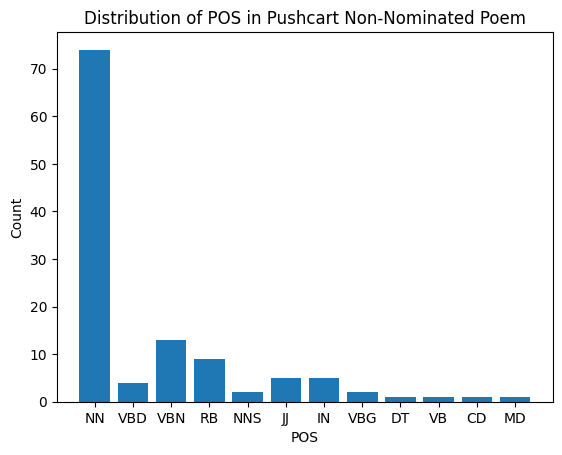

In [94]:
plot_dist_pos(data_df['dist_pos'][0])

In [95]:
data_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Author,Title,Poem,Poem_for_model,POS,dist_pos
0,2023,Lexi Pelle,DIET COKE,All I saw my mother drink \nfor years. In the ...,all saw my mother drink for years in the diner...,"[[(saw, NN)], [(mother, NN)], [(drink, NN)], [...","{'NN': 74, 'VBD': 4, 'VBN': 13, 'RB': 9, 'NNS'..."
1,2022,Nianxi Chen,JUNE IS ALMOST DONE,"June is almost done. In all of June,\nI didn’t...",june is almost done in all of june did not fin...,"[[(june, NN)], [(almost, RB)], [(done, VBN)], ...","{'NN': 46, 'RB': 4, 'VBN': 5, 'JJ': 7, 'JJR': ..."
2,2021,Danusha Laméris,APPOINTMENT,"I’m leaned back on the table, the nurse strapp...",am leaned back on the table the nurse strappin...,"[[(leaned, VBN)], [(back, RB)], [(table, NN)],...","{'VBN': 2, 'RB': 7, 'NN': 112, 'VBG': 10, 'IN'..."
3,2021,Jinendra Jain,THOSE DAYS,You can take all the rusting gold I secreted a...,you can take all the rusting gold secreted awa...,"[[(take, VB)], [(rusting, VBG)], [(gold, NN)],...","{'VB': 1, 'VBG': 2, 'NN': 27, 'VBN': 4, 'RB': ..."
4,2022,Ting Li,A LITTLE FLOWER,A little flower doesn’t know how beautiful she...,little flower does not know how beautiful she ...,"[[(little, JJ)], [(flower, NN)], [(know, VB)],...","{'JJ': 3, 'NN': 22, 'VB': 4, 'RB': 4, 'NNS': 1..."


## 2.Compare the dist of POS in each poem

In [96]:
dist_pos(data_df['dist_pos'][i])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(['NN',
  'DT',
  'CD',
  'VBD',
  'VBN',
  'JJR',
  'MD',
  'VBG',
  'RB',
  'NNS',
  'JJ',
  'VB',
  'IN',
  'JJS'],
 [114, 2, 8, 3, 8, 1, 4, 6, 8, 6, 9, 9, 1, 1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


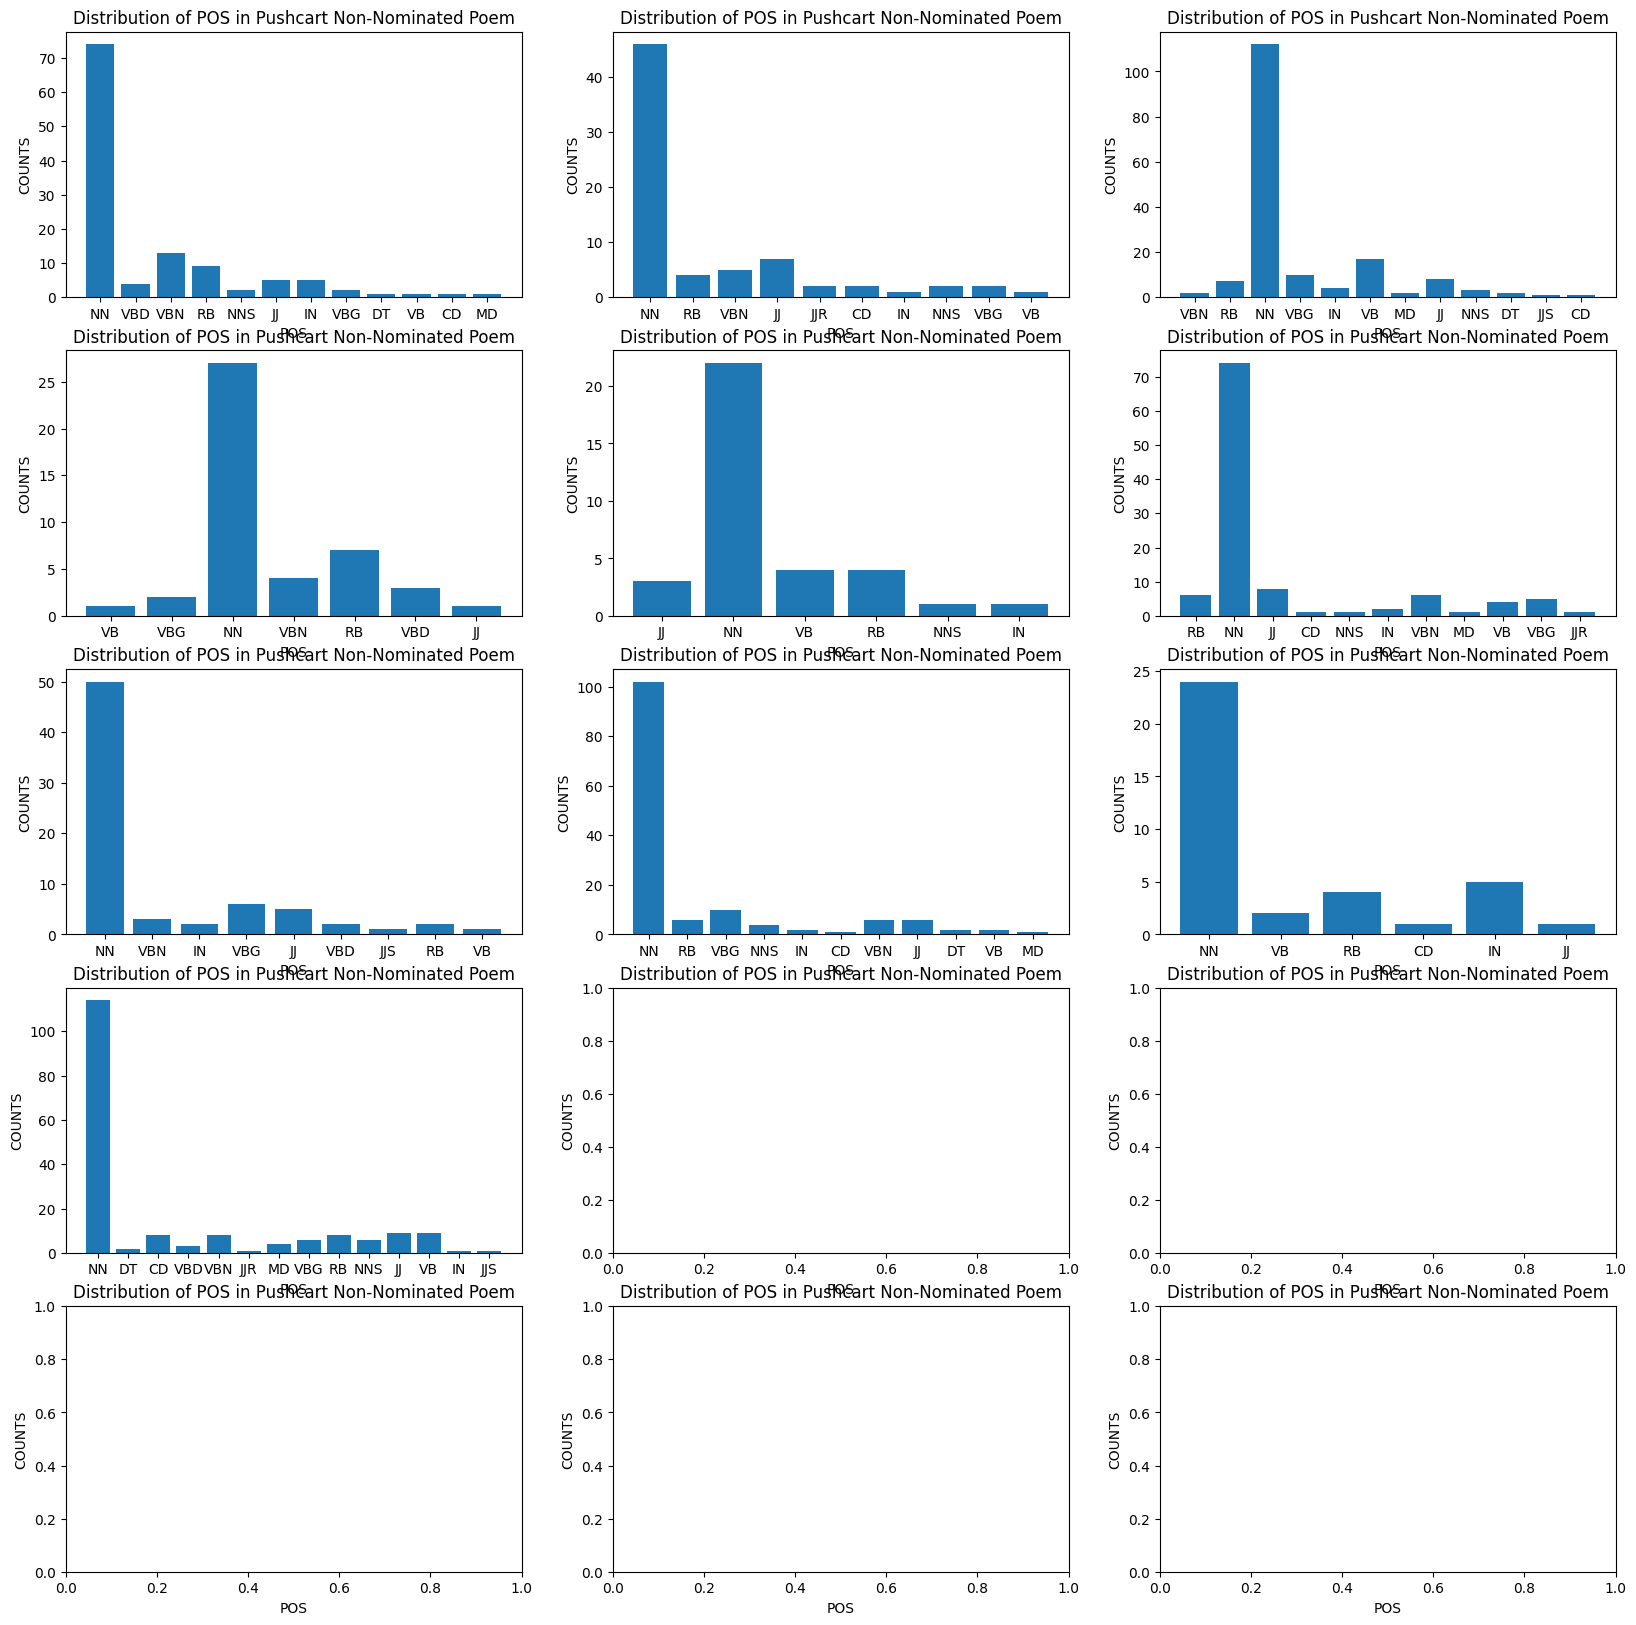

In [97]:
# Define the number of rows and columns for the plot grid
rows = 5
cols = 3

# Create the plot grid
fig, axs = plt.subplots(rows, cols, figsize=(20,20))

# Flatten the plot grid to access each subplot
axs = axs.flatten()

# Loop through the dataframe rows and plot the data points on each subplot
for i, row in data_df.iterrows():
    x = dist_pos(row['dist_pos'])
    axs[i].bar(x[0], x[1])

for i in range(len(axs)):
    axs[i].set_title(f"Distribution of POS in Pushcart Non-Nominated Poem")
    axs[i].set_xlabel("POS")
    axs[i].set_ylabel("COUNTS")

plt.show()

In [98]:
for i, row in data_df.iterrows():
    x = row['dist_pos']
    y = dist_pos(x)
    print(y)

(['NN', 'VBD', 'VBN', 'RB', 'NNS', 'JJ', 'IN', 'VBG', 'DT', 'VB', 'CD', 'MD'], [74, 4, 13, 9, 2, 5, 5, 2, 1, 1, 1, 1])
(['NN', 'RB', 'VBN', 'JJ', 'JJR', 'CD', 'IN', 'NNS', 'VBG', 'VB'], [46, 4, 5, 7, 2, 2, 1, 2, 2, 1])
(['VBN', 'RB', 'NN', 'VBG', 'IN', 'VB', 'MD', 'JJ', 'NNS', 'DT', 'JJS', 'CD'], [2, 7, 112, 10, 4, 17, 2, 8, 3, 2, 1, 1])
(['VB', 'VBG', 'NN', 'VBN', 'RB', 'VBD', 'JJ'], [1, 2, 27, 4, 7, 3, 1])
(['JJ', 'NN', 'VB', 'RB', 'NNS', 'IN'], [3, 22, 4, 4, 1, 1])
(['RB', 'NN', 'JJ', 'CD', 'NNS', 'IN', 'VBN', 'MD', 'VB', 'VBG', 'JJR'], [6, 74, 8, 1, 1, 2, 6, 1, 4, 5, 1])
(['NN', 'VBN', 'IN', 'VBG', 'JJ', 'VBD', 'JJS', 'RB', 'VB'], [50, 3, 2, 6, 5, 2, 1, 2, 1])
(['NN', 'RB', 'VBG', 'NNS', 'IN', 'CD', 'VBN', 'JJ', 'DT', 'VB', 'MD'], [102, 6, 10, 4, 2, 1, 6, 6, 2, 2, 1])
(['NN', 'VB', 'RB', 'CD', 'IN', 'JJ'], [24, 2, 4, 1, 5, 1])
(['NN', 'DT', 'CD', 'VBD', 'VBN', 'JJR', 'MD', 'VBG', 'RB', 'NNS', 'JJ', 'VB', 'IN', 'JJS'], [114, 2, 8, 3, 8, 1, 4, 6, 8, 6, 9, 9, 1, 1])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
def buildPoemArray(data):
    poet = {}
    poems = list()
    for i in data:
        idx = "poem"+str(i) ##poem1
        poet[idx+"_title"] = data[i]["Title"] #poem1_title = tien
        poet[idx] = data[i]["Poem_for_model"] # poem
        poems.append(idx)
    poet['poems_array'] = poems
    return poet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [100]:
def extractAllPOS(poet):
    global_vrb = set()
    global_nns = set()
    global_adj = set()
    for key in poet['poems_array']:
        text = poet[key]
        word_list = word_tokenize(text)
        pos_value = nltk.pos_tag(word_list)
        poet["pos_"+key] = pos_value

        vrb = set([word for (word, pos) in pos_value if (pos.startswith('VB'))])
        nns = set([word for (word, pos) in pos_value if (pos.startswith('NN'))])
        adj = set([word for (word, pos) in pos_value if (pos.startswith('JJ'))])

        poet["verbs_"+key] = list(vrb)
        poet["nouns_"+key] = list(nns)
        poet["adjectives_"+key] = list(adj)

        global_vrb = set.union(global_vrb, vrb)
        global_nns = set.union(global_nns, nns)
        global_adj = set.union(global_adj, adj)

    poet["all_verbs"] = list(global_vrb)
    poet["all_nouns"] = list(global_nns)
    poet["all_adjectives"] = list(global_adj)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
def getPOS(file_name, df):
    pos = ""
    if os.path.exists(file_name):
        with open(file_name, 'r') as file:
            pos = json.load(file)
    else:
        pos = buildPoemArray(json.loads(df.to_json(orient="index")))
        extractAllPOS(pos)
        with open(file_name, 'w') as file:
            json.dump(pos, file)
    return pos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
file_name = store_location + "NonPushcart-Nominations.json"
pc_pos = getPOS(file_name, data_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
def count_pos(tokens):
    pos_counts = nltk.FreqDist(tag for word, tag in nltk.pos_tag(tokens))
    return pos_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 3.Superimpose them on each other in terms of ratios of POS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


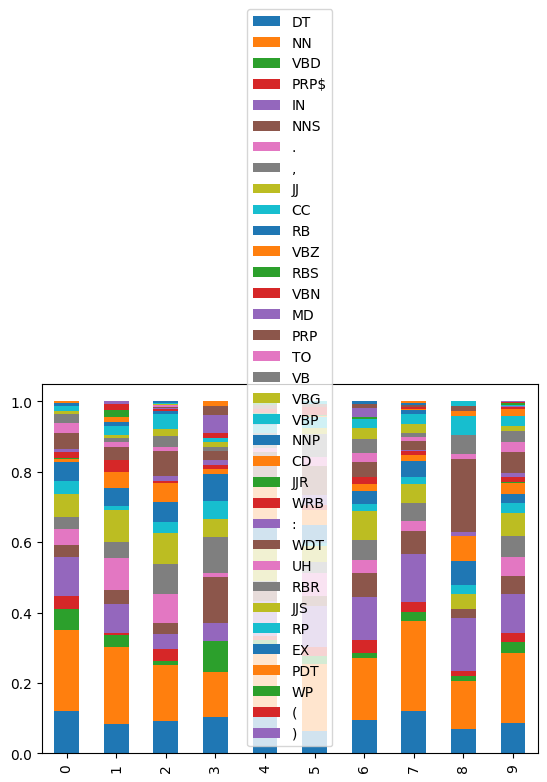

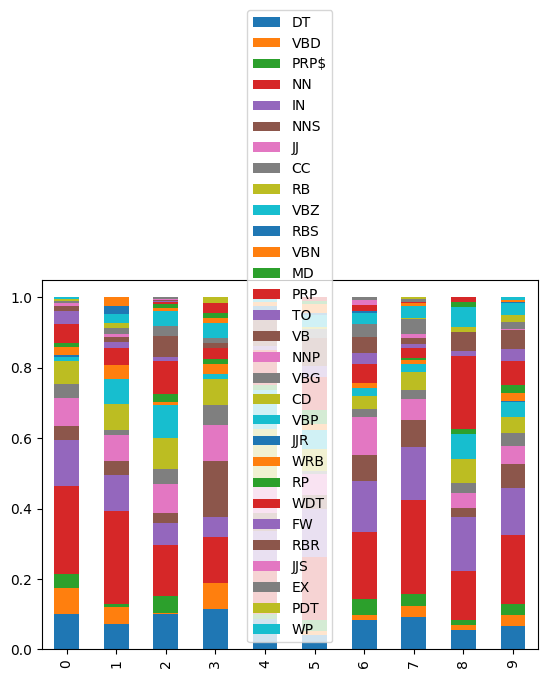

In [104]:
pos_data_nn = []
for poem in poems_Non_Nominated:
    tokens = nltk.word_tokenize(poem.lower())
    pos_counts_n = count_pos(tokens)
    pos_data_nn.append(pos_counts_n)

# Combine POS counts into a DataFrame
pos_df_nn = pd.DataFrame(pos_data_nn)
pos_df_nn.fillna(0, inplace=True)

# Normalize the counts to get proportions
pos_df_nn = pos_df_nn.div(pos_df_nn.sum(axis=1), axis=0)

# Plot the data using a stacked bar chart
pos_df_nn.plot(kind='bar', stacked=True)
plt.show()

pos_data_nn = []
for poem in poems_list:
    tokens = nltk.word_tokenize(poem.lower())
    pos_counts_nn = count_pos(tokens)
    pos_data_nn.append(pos_counts_nn)

# Combine POS counts into a DataFrame
pos_df_nn = pd.DataFrame(pos_data_nn)
pos_df_nn.fillna(0, inplace=True)

# Normalize the counts to get proportions
pos_df_nn = pos_df_nn.div(pos_df_nn.sum(axis=1), axis=0)

# Plot the data using a stacked bar chart
pos_df_nn.plot(kind='bar', stacked=True)
plt.show()

## 4.Gold/reference standard
 → What did the nominated poems have in common (common denominator)

In [105]:
for poem in poems_Non_Nominated:
    print(poem)

All I saw my mother drink 
for years. In the diner, served 
with a striped straw and shredded
paper beanie or sometimes 
at Stop & Shop just before checkout, 
its perfect plastic body pulled from 
the squat fridge that sits underneath 
the conveyor belt—but most often 
sipped from a silver can on the porch. 
She never asked for ice. Never dared 
to dilute the fizzy pollution of artificial 
sweeteners. The first time I tried it 
I thought it tasted like a backhanded 
compliment, surprisingly good, 
the dark dizzying lake like a cactus 
burped Splenda into my mouth. 
The flavor so far from milk or juice, 
like a fresh-squeezed robot, a supermodel’s 
saliva. My sister and I sat around her 
like the students of Socrates and watched her 
succumb to the only sweetness she ever allowed
herself. A true mother, listening 
to the questions it spat into the air,
voice lifted at the end of every swallowed
sentence. Let’s play the quiet game? 
she suggested on long car trips
to Hershey or to one of

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
import nltk
from collections import Counter

# Assuming you have already loaded the poems into the 'poems_NonNominated' list

pos_counts_n = []
for poem in poems_Non_Nominated:
    words_n = nltk.word_tokenize(poem)
    pos_tags_n = nltk.pos_tag(words_n)  # Fix variable name 'words_n'
    pos_counts_n.append(Counter([tag for word, tag in pos_tags_n]))  # Fix variable name 'pos_tags_n'

# Combine POS counts for all poems
total_counts_n = Counter()
for counts in pos_counts_n:
    total_counts_n += counts

# Calculate total number of words across all poems
total_words_n = sum(total_counts_n.values())

# Calculate proportion of each POS tag
pos_proportions_n = {tag: count / total_words_n for tag, count in total_counts_n.items()}

# Identify most common POS tags
most_common_n = total_counts_n.most_common(5)  # Top 5 most common tags

# Print results
print("Most common POS tags for Non Nominated Poems:")
for tag, count in most_common_n:
    print(f"{tag}: {count} ({pos_proportions_n[tag]:.2%})")


Most common POS tags for Non Nominated Poems:
NN: 376 (16.70%)
IN: 215 (9.55%)
DT: 210 (9.33%)
PRP: 177 (7.86%)
JJ: 135 (5.99%)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 5.Plot stats

In [107]:
print(most_common_n)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('NN', 376), ('IN', 215), ('DT', 210), ('PRP', 177), ('JJ', 135)]


In [108]:
print(pos_proportions_n)

{'DT': 0.09325044404973357, 'PRP': 0.07859680284191829, 'VBD': 0.028419182948490232, 'PRP$': 0.02664298401420959, 'NN': 0.1669626998223801, 'IN': 0.09547069271758436, 'NNS': 0.043516873889875664, '.': 0.0541740674955595, ',': 0.055062166962699825, 'JJ': 0.05994671403197158, 'CC': 0.024422735346358793, 'RB': 0.04706927175843695, 'NNP': 0.03063943161634103, 'VBZ': 0.03818827708703375, 'RBS': 0.0008880994671403197, 'VBN': 0.011989342806394316, 'MD': 0.011989342806394316, 'TO': 0.018206039076376555, 'VB': 0.03019538188277087, 'VBG': 0.016429840142095916, 'VBP': 0.03063943161634103, 'NNPS': 0.0004440497335701599, 'CD': 0.005772646536412078, 'JJR': 0.003108348134991119, 'WRB': 0.007992895204262877, ':': 0.004884547069271759, 'UH': 0.0013321492007104796, 'WDT': 0.004884547069271759, 'RBR': 0.0004440497335701599, 'JJS': 0.0004440497335701599, 'RP': 0.0026642984014209592, 'EX': 0.002220248667850799, 'PDT': 0.0008880994671403197, 'WP': 0.0013321492007104796, '(': 0.0004440497335701599, ')': 0.00

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
sorted_pos_percentages_n = {k: v for k, v in sorted(pos_proportions_n.items(), key=lambda item: item[1], reverse=True)}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [110]:
for tag, count in most_common_n:
  sorted_pos_percentages_n = {k: v for k, v in sorted(pos_proportions_n.items(), key=lambda item: item[1], reverse=True)}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


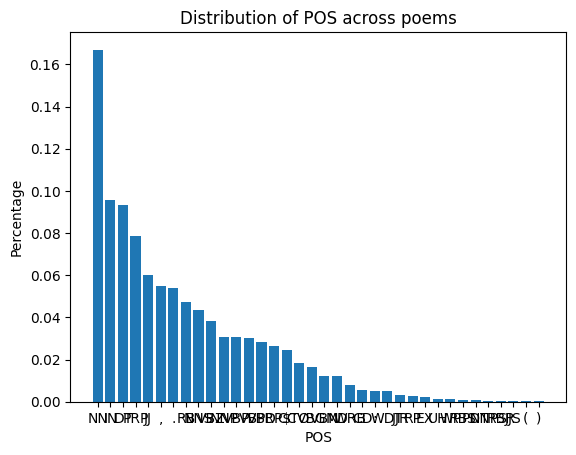

In [111]:
plt.bar(sorted_pos_percentages_n.keys(), sorted_pos_percentages_n.values())
plt.xlabel('POS')
plt.ylabel('Percentage')
plt.title('Distribution of POS across poems')
plt.show()

In [112]:
most_common_pos = {}
for tag, count in most_common_n:
  most_common_pos[tag] = pos_proportions_n[tag]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [113]:
print(most_common_pos)

{'NN': 0.1669626998223801, 'IN': 0.09547069271758436, 'DT': 0.09325044404973357, 'PRP': 0.07859680284191829, 'JJ': 0.05994671403197158}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


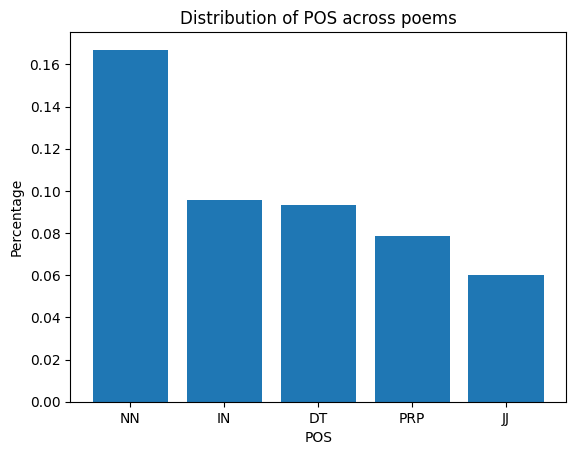

In [114]:
plt.bar(most_common_pos.keys(), most_common_pos.values())
plt.xlabel('POS')
plt.ylabel('Percentage')
plt.title('Distribution of POS across poems')
plt.show()

# B. Topic

In [115]:
data_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Author,Title,Poem,Poem_for_model,POS,dist_pos
0,2023,Lexi Pelle,DIET COKE,All I saw my mother drink \nfor years. In the ...,all saw my mother drink for years in the diner...,"[[(saw, NN)], [(mother, NN)], [(drink, NN)], [...","{'NN': 74, 'VBD': 4, 'VBN': 13, 'RB': 9, 'NNS'..."
1,2022,Nianxi Chen,JUNE IS ALMOST DONE,"June is almost done. In all of June,\nI didn’t...",june is almost done in all of june did not fin...,"[[(june, NN)], [(almost, RB)], [(done, VBN)], ...","{'NN': 46, 'RB': 4, 'VBN': 5, 'JJ': 7, 'JJR': ..."
2,2021,Danusha Laméris,APPOINTMENT,"I’m leaned back on the table, the nurse strapp...",am leaned back on the table the nurse strappin...,"[[(leaned, VBN)], [(back, RB)], [(table, NN)],...","{'VBN': 2, 'RB': 7, 'NN': 112, 'VBG': 10, 'IN'..."
3,2021,Jinendra Jain,THOSE DAYS,You can take all the rusting gold I secreted a...,you can take all the rusting gold secreted awa...,"[[(take, VB)], [(rusting, VBG)], [(gold, NN)],...","{'VB': 1, 'VBG': 2, 'NN': 27, 'VBN': 4, 'RB': ..."
4,2022,Ting Li,A LITTLE FLOWER,A little flower doesn’t know how beautiful she...,little flower does not know how beautiful she ...,"[[(little, JJ)], [(flower, NN)], [(know, VB)],...","{'JJ': 3, 'NN': 22, 'VB': 4, 'RB': 4, 'NNS': 1..."


In [116]:
# Preprocess the poems
preprocessed_corpus = []
for poem in poems_list:
    # Tokenize the poem
    tokens = nltk.word_tokenize(poem)

    # Remove stop words and lemmatize words
    processed_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]

    # Add processed tokens to preprocessed_corpus
    preprocessed_corpus.append(processed_tokens)

# Create dictionary and bag-of-words representations of poems
dictionary = corpora.Dictionary(preprocessed_corpus)
bow_corpus = [dictionary.doc2bow(poem) for poem in preprocessed_corpus]

# Create the document-term matrix
dtm = corpora.MmCorpus.serialize('dtm_corpus.mm', bow_corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
 #Preprocess the poems
dictionary = corpora.Dictionary(preprocessed_corpus)
corpus = [dictionary.doc2bow(poem) for poem in preprocessed_corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
from gensim.models import LdaModel

# Train an LDA model on the document-term matrix
lda_model = LdaModel(dtm, num_topics=5, id2word=dictionary, passes=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
from gensim.models import CoherenceModel

# Compute the coherence score of the model
coherence_score = CoherenceModel(model=lda_model, texts=preprocessed_corpus, dictionary=dictionary, coherence='c_v').get_coherence()

print(f"Coherence Score: {coherence_score}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.6433820793788756


In [120]:
for topic_num, topic_words in lda_model.show_topics(num_topics=-1, num_words=10):
    print(f"Topic {topic_num+1}: {topic_words}")

Topic 1: 0.002*"asked" + 0.002*"stiffened" + 0.002*"muscle" + 0.002*"ring" + 0.002*"goat" + 0.002*"smurf" + 0.002*"35" + 0.002*"end" + 0.002*"flooded" + 0.002*"towards"
Topic 2: 0.002*"garden" + 0.002*"found" + 0.002*"backhanded" + 0.002*"coming" + 0.002*"another" + 0.002*"circle" + 0.002*"third" + 0.002*"doris" + 0.002*"curled" + 0.002*"addiction"
Topic 3: 0.002*"bloom" + 0.002*"sink" + 0.002*"bought" + 0.002*"horse" + 0.002*"voice" + 0.002*"boast" + 0.002*"pink" + 0.002*"confessing" + 0.002*"grief" + 0.002*"small"
Topic 4: 0.002*"sanctified" + 0.002*"shoulder" + 0.002*"seat" + 0.002*"walk" + 0.002*"cracked" + 0.002*"larger" + 0.002*"essential" + 0.002*"mat" + 0.002*"today" + 0.002*"told"
Topic 5: 0.002*"boy" + 0.002*"fizzy" + 0.002*"told" + 0.002*"mat" + 0.002*"flaming" + 0.002*"time" + 0.002*"drag" + 0.002*"brahmaputra" + 0.002*"dilute" + 0.002*"cantilever"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [121]:
preprocessed_corpus = []
    # Tokenize the poem
tokens = nltk.word_tokenize(data_df['Poem_for_model'][0])

    # Remove stop words and lemmatize words
processed_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]

    # Add processed tokens to preprocessed_corpus
preprocessed_corpus.append(processed_tokens)

# Create dictionary and bag-of-words representations of poems
dictionary = corpora.Dictionary(preprocessed_corpus)
bow_corpus = [dictionary.doc2bow(poem) for poem in preprocessed_corpus]

# Create the document-term matrix
dtm_p1 = corpora.MmCorpus.serialize('dtm_corpus.mm', bow_corpus)

lda_model_p1 = LdaModel(dtm_p1, num_topics=5, id2word=dictionary, passes=10)

coherence_score_p1 = CoherenceModel(model=lda_model_p1, texts=preprocessed_corpus, dictionary=dictionary, coherence='c_v').get_coherence()

print(f"Coherence Score: {coherence_score}")

for topic_num, topic_words in lda_model_p1.show_topics(num_topics=-1, num_words=10):
    print(f"Topic {topic_num+1}: {topic_words}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.6433820793788756
Topic 1: 0.011*"long" + 0.011*"juice" + 0.011*"sat" + 0.010*"end" + 0.010*"could" + 0.010*"supermodel" + 0.010*"hear" + 0.010*"like" + 0.010*"robot" + 0.010*"listening"
Topic 2: 0.011*"artificial" + 0.011*"often" + 0.010*"served" + 0.010*"kate" + 0.010*"saliva" + 0.010*"fridge" + 0.010*"perfect" + 0.010*"good" + 0.010*"sweetener" + 0.010*"spat"
Topic 3: 0.010*"body" + 0.010*"artificial" + 0.010*"air" + 0.010*"silver" + 0.010*"listening" + 0.010*"squat" + 0.010*"dared" + 0.010*"squeezed" + 0.010*"time" + 0.010*"sister"
Topic 4: 0.011*"shredded" + 0.010*"plastic" + 0.010*"conveyor" + 0.010*"robot" + 0.010*"far" + 0.010*"student" + 0.010*"asked" + 0.010*"question" + 0.010*"cactus" + 0.010*"saliva"
Topic 5: 0.011*"compliment" + 0.010*"drink" + 0.010*"soccer" + 0.010*"plastic" + 0.010*"speed" + 0.010*"flavor" + 0.010*"question" + 0.010*"allowed" + 0.010*"dizzying" + 0.010*"lake"


In [122]:
def topic_model(poem):
  vectorizer = CountVectorizer()
  doc_term_matrix = vectorizer.fit_transform(poem)
  lda_model = LatentDirichletAllocation(n_components=5, random_state=0)
  lda_model.fit(doc_term_matrix)
  for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}: {' '.join([vectorizer.get_feature_names()[index] for index in topic.argsort()[:-11:-1]])}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
def docterm_matrix(poem):
  poem = poem.translate(str.maketrans('', '', string.punctuation))
  print(poem)
  poem = poem.lower()
  words = word_tokenize(poem)
  stop_words = set(stopwords.words('english'))
  words = [word for word in words if word not in stop_words]
  vectorizer = CountVectorizer()
  doc_term_matrix = vectorizer.fit_transform([' '.join(words)])
  return doc_term_matrix.toarray()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
data_df['doc_term_matrix'] = 4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# C. Sentiment Analysis

## 1.Analyze sentiments for the prize winning poems of that year

In [125]:
poem1 = data_df['Poem_for_model'][0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [126]:
data_df['sentiment'] = {}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [127]:
def check_sentiment(poem):
  sid = SentimentIntensityAnalyzer()
  scores = sid.polarity_scores(poem)
  return scores

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [128]:
nltk.download('vader_lexicon')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [129]:
for i in range(len(data_df)):
  poem = data_df['Poem_for_model'][i]
  data_df['sentiment'][i] = check_sentiment(poem)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:
data_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Author,Title,Poem,Poem_for_model,POS,dist_pos,doc_term_matrix,sentiment
0,2023,Lexi Pelle,DIET COKE,All I saw my mother drink \nfor years. In the ...,all saw my mother drink for years in the diner...,"[[(saw, NN)], [(mother, NN)], [(drink, NN)], [...","{'NN': 74, 'VBD': 4, 'VBN': 13, 'RB': 9, 'NNS'...",4,"{'neg': 0.01, 'neu': 0.834, 'pos': 0.155, 'com..."
1,2022,Nianxi Chen,JUNE IS ALMOST DONE,"June is almost done. In all of June,\nI didn’t...",june is almost done in all of june did not fin...,"[[(june, NN)], [(almost, RB)], [(done, VBN)], ...","{'NN': 46, 'RB': 4, 'VBN': 5, 'JJ': 7, 'JJR': ...",4,"{'neg': 0.024, 'neu': 0.956, 'pos': 0.02, 'com..."
2,2021,Danusha Laméris,APPOINTMENT,"I’m leaned back on the table, the nurse strapp...",am leaned back on the table the nurse strappin...,"[[(leaned, VBN)], [(back, RB)], [(table, NN)],...","{'VBN': 2, 'RB': 7, 'NN': 112, 'VBG': 10, 'IN'...",4,"{'neg': 0.1, 'neu': 0.842, 'pos': 0.058, 'comp..."
3,2021,Jinendra Jain,THOSE DAYS,You can take all the rusting gold I secreted a...,you can take all the rusting gold secreted awa...,"[[(take, VB)], [(rusting, VBG)], [(gold, NN)],...","{'VB': 1, 'VBG': 2, 'NN': 27, 'VBN': 4, 'RB': ...",4,"{'neg': 0.06, 'neu': 0.85, 'pos': 0.09, 'compo..."
4,2022,Ting Li,A LITTLE FLOWER,A little flower doesn’t know how beautiful she...,little flower does not know how beautiful she ...,"[[(little, JJ)], [(flower, NN)], [(know, VB)],...","{'JJ': 3, 'NN': 22, 'VB': 4, 'RB': 4, 'NNS': 1...",4,"{'neg': 0.086, 'neu': 0.838, 'pos': 0.076, 'co..."


In [131]:
def plot_dist_sentiment(dict):
  senti = list(dict.keys())
  counts = list(dict.values())

  # Create a bar plot
  plt.bar(senti, counts)
  plt.xlabel('Sentiment')
  plt.ylabel('Count')
  plt.title('Distribution of Sentiments in Pushcart Non-Nominated Poem')
  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


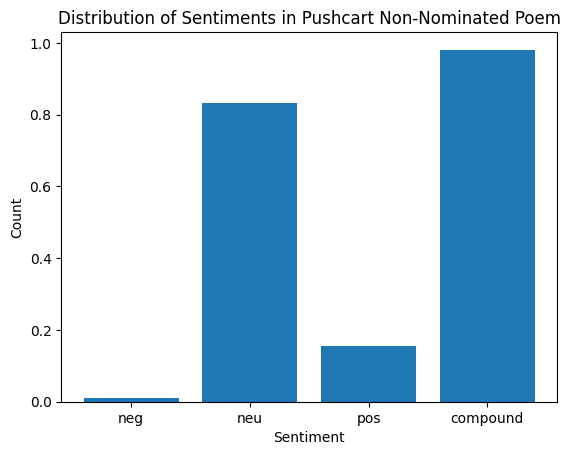

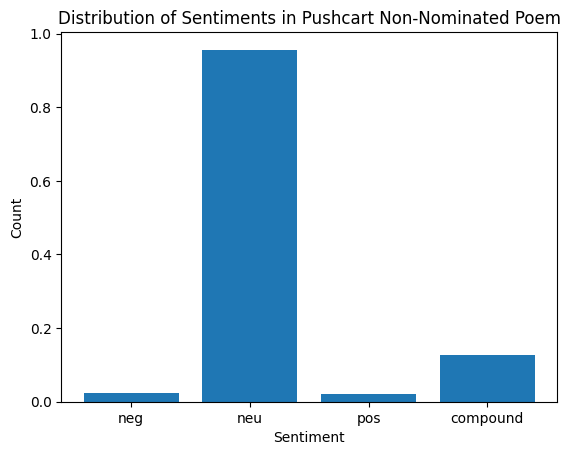

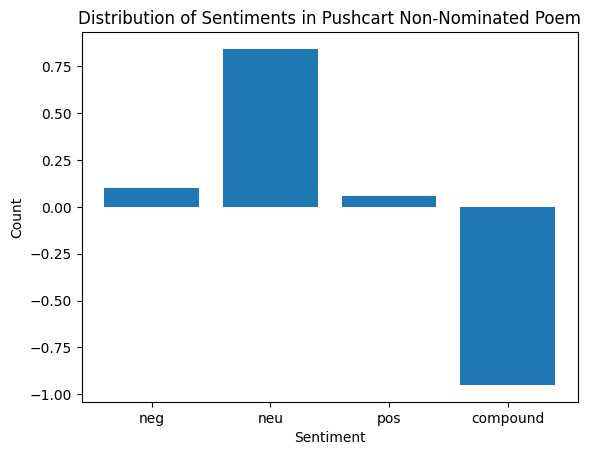

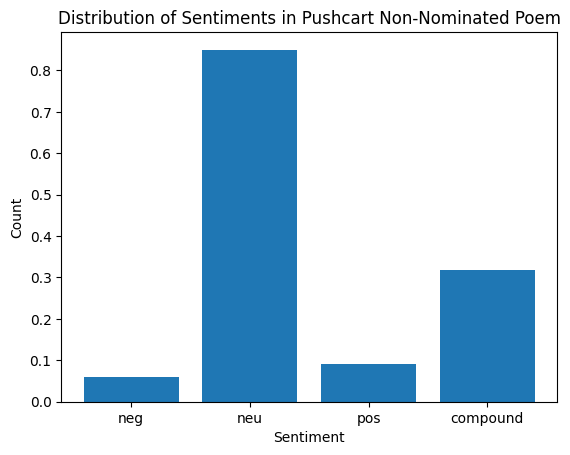

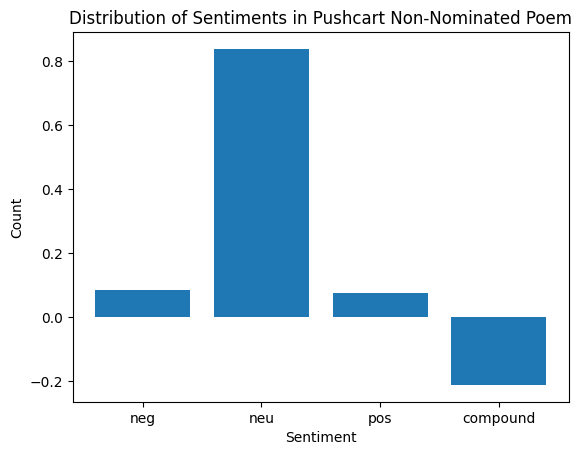

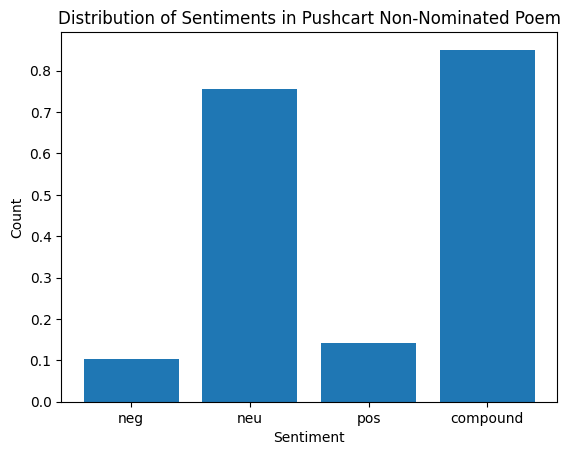

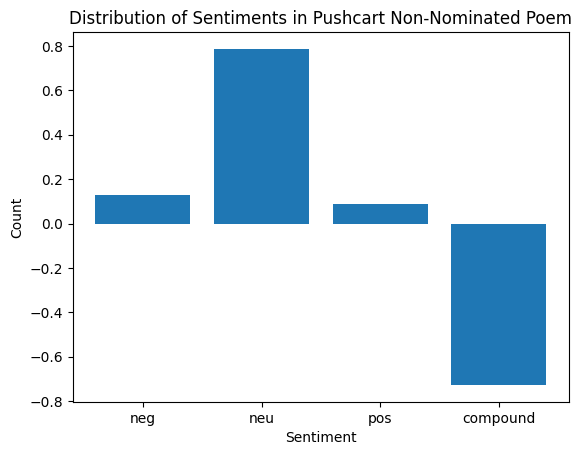

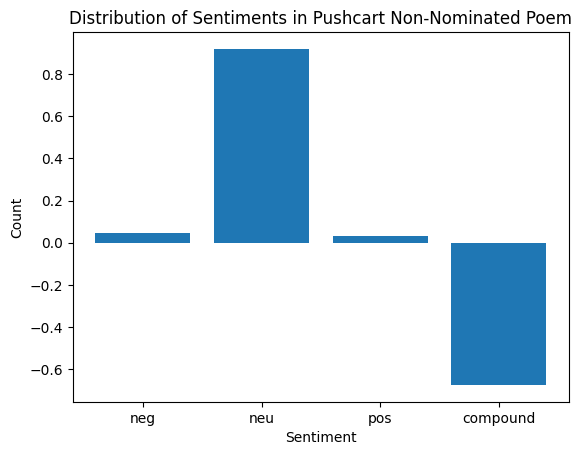

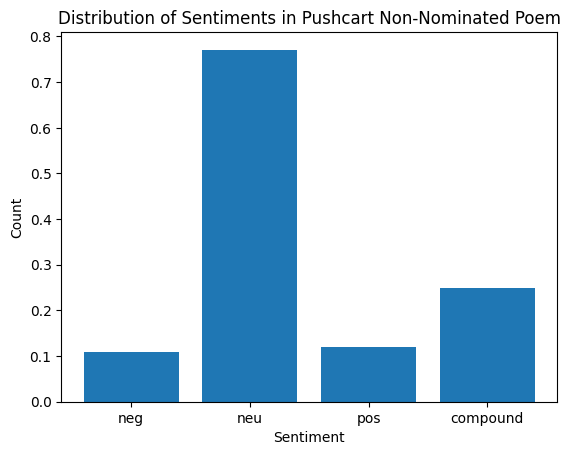

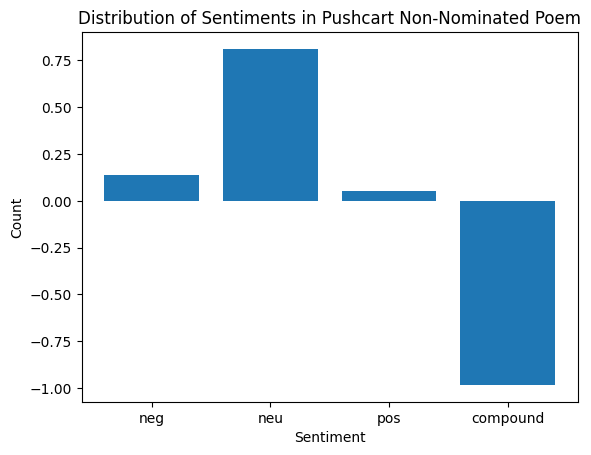

In [132]:
for i in range(len(data_df)):
  plot_dist_sentiment(data_df['sentiment'][i])

In [133]:
# Define the full file path
json_file_path = os.path.join(store_location, "Pushcart_NonNomination.json")

# Save the DataFrame to the JSON file
data_df.to_json(json_file_path, orient='records', lines=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [134]:
poems_nn = data = pd.read_json(json_file_path, lines=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [135]:
poems_nn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Author,Title,Poem,Poem_for_model,POS,dist_pos,doc_term_matrix,sentiment
0,2023,Lexi Pelle,DIET COKE,All I saw my mother drink \nfor years. In the ...,all saw my mother drink for years in the diner...,"[[[saw, NN]], [[mother, NN]], [[drink, NN]], [...","{'NN': 74, 'VBD': 4, 'VBN': 13, 'RB': 9, 'NNS'...",4,"{'neg': 0.01, 'neu': 0.834, 'pos': 0.155, 'com..."
1,2022,Nianxi Chen,JUNE IS ALMOST DONE,"June is almost done. In all of June,\nI didn’t...",june is almost done in all of june did not fin...,"[[[june, NN]], [[almost, RB]], [[done, VBN]], ...","{'NN': 46, 'RB': 4, 'VBN': 5, 'JJ': 7, 'JJR': ...",4,"{'neg': 0.024, 'neu': 0.9560000000000001, 'pos..."
2,2021,Danusha Laméris,APPOINTMENT,"I’m leaned back on the table, the nurse strapp...",am leaned back on the table the nurse strappin...,"[[[leaned, VBN]], [[back, RB]], [[table, NN]],...","{'VBN': 2, 'RB': 7, 'NN': 112, 'VBG': 10, 'IN'...",4,"{'neg': 0.1, 'neu': 0.842, 'pos': 0.058, 'comp..."
3,2021,Jinendra Jain,THOSE DAYS,You can take all the rusting gold I secreted a...,you can take all the rusting gold secreted awa...,"[[[take, VB]], [[rusting, VBG]], [[gold, NN]],...","{'VB': 1, 'VBG': 2, 'NN': 27, 'VBN': 4, 'RB': ...",4,"{'neg': 0.06, 'neu': 0.85, 'pos': 0.09, 'compo..."
4,2022,Ting Li,A LITTLE FLOWER,A little flower doesn’t know how beautiful she...,little flower does not know how beautiful she ...,"[[[little, JJ]], [[flower, NN]], [[know, VB]],...","{'JJ': 3, 'NN': 22, 'VB': 4, 'RB': 4, 'NNS': 1...",4,"{'neg': 0.08600000000000001, 'neu': 0.838, 'po..."
5,2023,Karan Kapoor,PORTRAIT OF THE FATHER AS AN ALCOHOLIC,The first thing I notice about him\nis the exp...,the first thing notice about him is the expres...,"[[[first, RB]], [[thing, NN]], [[notice, NN]],...","{'RB': 6, 'NN': 74, 'JJ': 8, 'CD': 1, 'NNS': 1...",4,"{'neg': 0.10400000000000001, 'neu': 0.755, 'po..."
6,2023,Pella Winkopp,UNDERWATER LAKES,there is a stillness in me that refuses to be ...,there is stillness in me that refuses to be tr...,"[[[stillness, NN]], [[refuse, NN]], [[translat...","{'NN': 50, 'VBN': 3, 'IN': 2, 'VBG': 6, 'JJ': ...",4,"{'neg': 0.127, 'neu': 0.786, 'pos': 0.088, 'co..."
7,2021,Srinivas Mandavilli,RAIN,"We lay together on a charpoy, the thrum on asb...",we lay together on charpoy the thrum on asbest...,"[[[lay, NN]], [[together, RB]], [[charpoy, NN]...","{'NN': 102, 'RB': 6, 'VBG': 10, 'NNS': 4, 'IN'...",4,"{'neg': 0.047, 'neu': 0.92, 'pos': 0.033, 'com..."
8,2022,Max Sessner,ONE DAY,Everything comes back to haunt us\none day the...,everything comes back to haunt us one day the ...,"[[[everything, NN]], [[come, VB]], [[back, RB]...","{'NN': 24, 'VB': 2, 'RB': 4, 'CD': 1, 'IN': 5,...",4,"{'neg': 0.108, 'neu': 0.771, 'pos': 0.12, 'com..."
9,2023,M,SALT,In this room down a hall\nat the Hopewell Hous...,in this room down hall at the hopewell house e...,"[[[room, NN]], [[hall, NN]], [[hopewell, NN]],...","{'NN': 114, 'DT': 2, 'CD': 8, 'VBD': 3, 'VBN':...",4,"{'neg': 0.139, 'neu': 0.811, 'pos': 0.05, 'com..."


#D. Analyze and Rank the "new" poems
Analyze and Rank the "new" poems relative to the pushcart nominated ones. Devise a ranking system . Compare new poems and some other pushcart nominees with the gold standard so you establish a baseline .

In [140]:
store_location_n = "/content/drive/MyDrive/Pushcart/"
json_filename = "Pushcart_Nomination.json"
# Construct the full file path
pushcart_nominated = store_location_n + json_filename
print(pushcart_nominated )

# Read the JSON file into a DataFrame
data_n = pd.read_json(pushcart_nominated ,lines=True)

/content/drive/MyDrive/Pushcart/Pushcart_Nomination.json


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [141]:
store_location_nn = "/content/drive/MyDrive/Non-Pushcart/"
json_filename = "Pushcart_NonNomination.json"
# Construct the full file path
pushcart_non_nominated = store_location_nn + json_filename

# Read the JSON file into a DataFrame
data_nn = pd.read_json(pushcart_non_nominated ,lines=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [142]:
data_n

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Author,Title,Poem,Poem_for_model,POS,dist_pos,doc_term_matrix,sentiment
0,2023,Christopher Hunter,"LOUISA, AGE 6, AT REST",Louisa alighting into placeAlways dazzles me.\...,louisa alighting into placealways dazzles me s...,"[[[louisa, NN]], [[alighting, VBG]], [[placeal...","{'NN': 12, 'VBG': 2, 'NNS': 2, 'VBN': 1, 'RB':...",4,"{'neg': 0.048, 'neu': 0.9520000000000001, 'pos..."
1,2023,Susan J Koch,SOFIA,I cannot disrememberthree carefree boysdraggin...,cannot disrememberthree carefree boysdragging ...,"[[[disrememberthree, NN]], [[carefree, NN]], [...",{'NN': 9},4,"{'neg': 0.184, 'neu': 0.8160000000000001, 'pos..."
2,2023,John Mitchell,NICHOLAS II,The ghost of the Tsar walks.He passes some Jew...,the ghost of the tsar walks he passes some jew...,"[[[ghost, NN]], [[tsar, NN]], [[walk, NN]], [[...","{'NN': 41, 'CD': 1, 'DT': 1, 'JJ': 5, 'VBG': 1...",4,"{'neg': 0.20400000000000001, 'neu': 0.726, 'po..."
3,2023,Alise Palmer,BELTANE,"A boy green shouldered, growslike corn endless...",boy green shouldered growslike corn endlessly ...,"[[[boy, NN]], [[green, JJ]], [[shouldered, VBN...","{'NN': 28, 'JJ': 3, 'VBN': 3, 'RB': 1, 'VBG': ...",4,"{'neg': 0.056, 'neu': 0.839, 'pos': 0.105, 'co..."
4,2023,Rose Postma,ON TELLING MY MOTHER I AM PREGNANT AGAIN,"My mother, who spent the day after my birth tr...",my mother who spent the day after my birth try...,"[[[mother, NN]], [[spent, NN]], [[day, NN]], [...","{'NN': 56, 'VBG': 4, 'DT': 2, 'VBD': 3, 'CD': ...",4,"{'neg': 0.108, 'neu': 0.75, 'pos': 0.142000000..."
5,2022,Phoebe Bubendorfer,OIL SPILL,A red-throated loonmired in a slick of oilstra...,red throated loonmired in slick of oilstrains ...,"[[[red, JJ]], [[throated, VBN]], [[loonmired, ...","{'JJ': 2, 'VBN': 2, 'NN': 12, 'NNS': 2, 'CD': ...",4,"{'neg': 0.045, 'neu': 0.9550000000000001, 'pos..."
6,2022,Bill Graeser,THE BURNING OF THE WHALES,Fire never seems to mindwhether it's the curl ...,fire never seems to mindwhether it is the curl...,"[[[fire, NN]], [[never, RB]], [[seems, VBZ]], ...","{'NN': 25, 'RB': 5, 'VBZ': 1, 'VBG': 3, 'VBN':...",4,"{'neg': 0.089, 'neu': 0.88, 'pos': 0.032, 'com..."
7,2022,John Mitchell,THE BUFFALO,The buffalo stands still in the wind.Staring a...,the buffalo stands still in the wind staring a...,"[[[buffalo, NN]], [[stand, NN]], [[still, RB]]...","{'NN': 18, 'RB': 3, 'VBG': 4, 'JJ': 5, 'VBN': 1}",4,"{'neg': 0.05, 'neu': 0.865, 'pos': 0.085, 'com..."
8,2022,Lily Nelson,FEVER,You are nineLying on the front room couchAnd t...,you are ninelying on the front room couchand t...,"[[[ninelying, VBG]], [[front, NN]], [[room, NN...","{'VBG': 5, 'NN': 35, 'IN': 4, 'VBN': 1, 'RB': ...",4,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp..."
9,2022,Lucille Morgan Wilson,LISTENING TO DVORAK'S HUMORESQUE,The fingered notes play up and down my spineli...,the fingered notes play up and down my spineli...,"[[[fingered, VBN]], [[note, NN]], [[play, NN]]...","{'VBN': 2, 'NN': 48, 'VBG': 4, 'NNS': 1, 'JJ': 3}",4,"{'neg': 0.035, 'neu': 0.7010000000000001, 'pos..."


In [147]:
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess(text):
    # Tokenize and convert to lower case
    tokens = word_tokenize(text.lower())
    # Remove stop words and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha() and not word in stop_words]
    return tokens

# Apply preprocessing to each poem
data_n['processed_poems'] = data_n['Poem_for_model'].apply(preprocess)
data_n

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Author,Title,Poem,Poem_for_model,POS,dist_pos,doc_term_matrix,sentiment,processed_poems,similarity_to_first
0,2023,Christopher Hunter,"LOUISA, AGE 6, AT REST",Louisa alighting into placeAlways dazzles me.\...,louisa alighting into placealways dazzles me s...,"[[[louisa, NN]], [[alighting, VBG]], [[placeal...","{'NN': 12, 'VBG': 2, 'NNS': 2, 'VBN': 1, 'RB':...",4,"{'neg': 0.048, 'neu': 0.9520000000000001, 'pos...","[louisa, alighting, placealways, dazzles, twis...",1.000000
9,2022,Lucille Morgan Wilson,LISTENING TO DVORAK'S HUMORESQUE,The fingered notes play up and down my spineli...,the fingered notes play up and down my spineli...,"[[[fingered, VBN]], [[note, NN]], [[play, NN]]...","{'VBN': 2, 'NN': 48, 'VBG': 4, 'NNS': 1, 'JJ': 3}",4,"{'neg': 0.035, 'neu': 0.7010000000000001, 'pos...","[fingered, notes, play, spinelike, gentle, rip...",0.999080
5,2022,Phoebe Bubendorfer,OIL SPILL,A red-throated loonmired in a slick of oilstra...,red throated loonmired in slick of oilstrains ...,"[[[red, JJ]], [[throated, VBN]], [[loonmired, ...","{'JJ': 2, 'VBN': 2, 'NN': 12, 'NNS': 2, 'CD': ...",4,"{'neg': 0.045, 'neu': 0.9550000000000001, 'pos...","[red, throated, loonmired, slick, oilstrains, ...",0.998951
11,2021,Heather Ann Clark,TURTLE SHELLS,My therapist asks what else is on my mind.A pi...,my therapist asks what else is on my mind pith...,"[[[therapist, NN]], [[asks, NNS]], [[else, RB]...","{'NN': 38, 'NNS': 1, 'RB': 8, 'VBG': 3, 'VBD':...",4,"{'neg': 0.085, 'neu': 0.788, 'pos': 0.128, 'co...","[therapist, asks, else, mind, pithy, incident,...",0.998834
14,2021,Erik Trilk,DAZED AND CONFUSED,It won't be long until I'm with the moonthis s...,it will not be long until am with the moonthis...,"[[[long, RB]], [[moonthis, NN]], [[summer, NN]...","{'RB': 4, 'NN': 48, 'VBN': 6, 'JJ': 6, 'NNS': ...",4,"{'neg': 0.084, 'neu': 0.804, 'pos': 0.113, 'co...","[long, moonthis, summer, bare, feet, whisper, ...",0.998788
3,2023,Alise Palmer,BELTANE,"A boy green shouldered, growslike corn endless...",boy green shouldered growslike corn endlessly ...,"[[[boy, NN]], [[green, JJ]], [[shouldered, VBN...","{'NN': 28, 'JJ': 3, 'VBN': 3, 'RB': 1, 'VBG': ...",4,"{'neg': 0.056, 'neu': 0.839, 'pos': 0.105, 'co...","[boy, green, shouldered, growslike, corn, endl...",0.998779
12,2021,Jared Pearce,ILLNESS,It's like waiting for the elevatordoors to rel...,it is like waiting for the elevatordoors to re...,"[[[like, IN]], [[waiting, VBG]], [[elevatordoo...","{'IN': 2, 'VBG': 6, 'NNS': 3, 'NN': 28, 'VB': ...",4,"{'neg': 0.042, 'neu': 0.754, 'pos': 0.20400000...","[like, waiting, elevatordoors, release, lettin...",0.998686
13,2021,Shelly Reed Thieman,ON THE ANNIVERSARY OF ANOTHER WINTER,"Tongue-tied with suet and peanutbutter, a quar...",tongue tied with suet and peanutbutter quartet...,"[[[tongue, NN]], [[tied, VBN]], [[suet, NN]], ...","{'NN': 39, 'VBN': 2, 'NNS': 4, 'VB': 1, 'RB': ...",4,"{'neg': 0.024, 'neu': 0.889, 'pos': 0.08600000...","[tongue, tied, suet, peanutbutter, quartet, nu...",0.998620
7,2022,John Mitchell,THE BUFFALO,The buffalo stands still in the wind.Staring a...,the buffalo stands still in the wind staring a...,"[[[buffalo, NN]], [[stand, NN]], [[still, RB]]...","{'NN': 18, 'RB': 3, 'VBG': 4, 'JJ': 5, 'VBN': 1}",4,"{'neg': 0.05, 'neu': 0.865, 'pos': 0.085, 'com...","[buffalo, stands, still, wind, staring, ahead,...",0.998611
8,2022,Lily Nelson,FEVER,You are nineLying on the front room couchAnd t...,you are ninelying on the front room couchand t...,"[[[ninelying, VBG]], [[front, NN]], [[room, NN...","{'VBG': 5, 'NN': 35, 'IN': 4, 'VBN': 1, 'RB': ...",4,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...","[ninelying, front, room, couchand, time, thick...",0.998548


In [144]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


tagged_data = [TaggedDocument(words=d, tags=[str(i)]) for i, d in enumerate(data_n['processed_poems'])]


model = Doc2Vec(tagged_data, vector_size=50, window=2, min_count=1, workers=4, epochs=40)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [150]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Infer vectors for the poems
poem_vectors = np.array([model.infer_vector(poem) for poem in data_n['processed_poems']])

# Calculate similarity (as an example, comparing each poem to the first one)
similarity_matrix = cosine_similarity(poem_vectors, poem_vectors[0].reshape(1, -1))

# Rank poems based on similarity to the first poem
data_n['similarity_to_first'] = similarity_matrix.flatten()
data_n.sort_values(by='similarity_to_first', ascending=False, inplace=True)
data_n


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Author,Title,Poem,Poem_for_model,POS,dist_pos,doc_term_matrix,sentiment,processed_poems,similarity_to_first
0,2023,Christopher Hunter,"LOUISA, AGE 6, AT REST",Louisa alighting into placeAlways dazzles me.\...,louisa alighting into placealways dazzles me s...,"[[[louisa, NN]], [[alighting, VBG]], [[placeal...","{'NN': 12, 'VBG': 2, 'NNS': 2, 'VBN': 1, 'RB':...",4,"{'neg': 0.048, 'neu': 0.9520000000000001, 'pos...","[louisa, alighting, placealways, dazzles, twis...",1.000000
9,2022,Lucille Morgan Wilson,LISTENING TO DVORAK'S HUMORESQUE,The fingered notes play up and down my spineli...,the fingered notes play up and down my spineli...,"[[[fingered, VBN]], [[note, NN]], [[play, NN]]...","{'VBN': 2, 'NN': 48, 'VBG': 4, 'NNS': 1, 'JJ': 3}",4,"{'neg': 0.035, 'neu': 0.7010000000000001, 'pos...","[fingered, notes, play, spinelike, gentle, rip...",0.999069
5,2022,Phoebe Bubendorfer,OIL SPILL,A red-throated loonmired in a slick of oilstra...,red throated loonmired in slick of oilstrains ...,"[[[red, JJ]], [[throated, VBN]], [[loonmired, ...","{'JJ': 2, 'VBN': 2, 'NN': 12, 'NNS': 2, 'CD': ...",4,"{'neg': 0.045, 'neu': 0.9550000000000001, 'pos...","[red, throated, loonmired, slick, oilstrains, ...",0.998940
11,2021,Heather Ann Clark,TURTLE SHELLS,My therapist asks what else is on my mind.A pi...,my therapist asks what else is on my mind pith...,"[[[therapist, NN]], [[asks, NNS]], [[else, RB]...","{'NN': 38, 'NNS': 1, 'RB': 8, 'VBG': 3, 'VBD':...",4,"{'neg': 0.085, 'neu': 0.788, 'pos': 0.128, 'co...","[therapist, asks, else, mind, pithy, incident,...",0.998891
14,2021,Erik Trilk,DAZED AND CONFUSED,It won't be long until I'm with the moonthis s...,it will not be long until am with the moonthis...,"[[[long, RB]], [[moonthis, NN]], [[summer, NN]...","{'RB': 4, 'NN': 48, 'VBN': 6, 'JJ': 6, 'NNS': ...",4,"{'neg': 0.084, 'neu': 0.804, 'pos': 0.113, 'co...","[long, moonthis, summer, bare, feet, whisper, ...",0.998822
3,2023,Alise Palmer,BELTANE,"A boy green shouldered, growslike corn endless...",boy green shouldered growslike corn endlessly ...,"[[[boy, NN]], [[green, JJ]], [[shouldered, VBN...","{'NN': 28, 'JJ': 3, 'VBN': 3, 'RB': 1, 'VBG': ...",4,"{'neg': 0.056, 'neu': 0.839, 'pos': 0.105, 'co...","[boy, green, shouldered, growslike, corn, endl...",0.998768
13,2021,Shelly Reed Thieman,ON THE ANNIVERSARY OF ANOTHER WINTER,"Tongue-tied with suet and peanutbutter, a quar...",tongue tied with suet and peanutbutter quartet...,"[[[tongue, NN]], [[tied, VBN]], [[suet, NN]], ...","{'NN': 39, 'VBN': 2, 'NNS': 4, 'VB': 1, 'RB': ...",4,"{'neg': 0.024, 'neu': 0.889, 'pos': 0.08600000...","[tongue, tied, suet, peanutbutter, quartet, nu...",0.998768
12,2021,Jared Pearce,ILLNESS,It's like waiting for the elevatordoors to rel...,it is like waiting for the elevatordoors to re...,"[[[like, IN]], [[waiting, VBG]], [[elevatordoo...","{'IN': 2, 'VBG': 6, 'NNS': 3, 'NN': 28, 'VB': ...",4,"{'neg': 0.042, 'neu': 0.754, 'pos': 0.20400000...","[like, waiting, elevatordoors, release, lettin...",0.998706
7,2022,John Mitchell,THE BUFFALO,The buffalo stands still in the wind.Staring a...,the buffalo stands still in the wind staring a...,"[[[buffalo, NN]], [[stand, NN]], [[still, RB]]...","{'NN': 18, 'RB': 3, 'VBG': 4, 'JJ': 5, 'VBN': 1}",4,"{'neg': 0.05, 'neu': 0.865, 'pos': 0.085, 'com...","[buffalo, stands, still, wind, staring, ahead,...",0.998611
2,2023,John Mitchell,NICHOLAS II,The ghost of the Tsar walks.He passes some Jew...,the ghost of the tsar walks he passes some jew...,"[[[ghost, NN]], [[tsar, NN]], [[walk, NN]], [[...","{'NN': 41, 'CD': 1, 'DT': 1, 'JJ': 5, 'VBG': 1...",4,"{'neg': 0.20400000000000001, 'neu': 0.726, 'po...","[ghost, tsar, walks, passes, jews, gypsies, on...",0.998590


In [151]:
# Apply preprocessing to each poem
data_nn['processed_poems'] = data_nn['Poem_for_model'].apply(preprocess)
data_nn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Author,Title,Poem,Poem_for_model,POS,dist_pos,doc_term_matrix,sentiment,processed_poems
0,2023,Lexi Pelle,DIET COKE,All I saw my mother drink \nfor years. In the ...,all saw my mother drink for years in the diner...,"[[[saw, NN]], [[mother, NN]], [[drink, NN]], [...","{'NN': 74, 'VBD': 4, 'VBN': 13, 'RB': 9, 'NNS'...",4,"{'neg': 0.01, 'neu': 0.834, 'pos': 0.155, 'com...","[saw, mother, drink, years, diner, served, str..."
1,2022,Nianxi Chen,JUNE IS ALMOST DONE,"June is almost done. In all of June,\nI didn’t...",june is almost done in all of june did not fin...,"[[[june, NN]], [[almost, RB]], [[done, VBN]], ...","{'NN': 46, 'RB': 4, 'VBN': 5, 'JJ': 7, 'JJR': ...",4,"{'neg': 0.024, 'neu': 0.9560000000000001, 'pos...","[june, almost, done, june, finish, single, thi..."
2,2021,Danusha Laméris,APPOINTMENT,"I’m leaned back on the table, the nurse strapp...",am leaned back on the table the nurse strappin...,"[[[leaned, VBN]], [[back, RB]], [[table, NN]],...","{'VBN': 2, 'RB': 7, 'NN': 112, 'VBG': 10, 'IN'...",4,"{'neg': 0.1, 'neu': 0.842, 'pos': 0.058, 'comp...","[leaned, back, table, nurse, strapping, band, ..."
3,2021,Jinendra Jain,THOSE DAYS,You can take all the rusting gold I secreted a...,you can take all the rusting gold secreted awa...,"[[[take, VB]], [[rusting, VBG]], [[gold, NN]],...","{'VB': 1, 'VBG': 2, 'NN': 27, 'VBN': 4, 'RB': ...",4,"{'neg': 0.06, 'neu': 0.85, 'pos': 0.09, 'compo...","[take, rusting, gold, secreted, away, monsoons..."
4,2022,Ting Li,A LITTLE FLOWER,A little flower doesn’t know how beautiful she...,little flower does not know how beautiful she ...,"[[[little, JJ]], [[flower, NN]], [[know, VB]],...","{'JJ': 3, 'NN': 22, 'VB': 4, 'RB': 4, 'NNS': 1...",4,"{'neg': 0.08600000000000001, 'neu': 0.838, 'po...","[little, flower, know, beautiful, concept, lit..."
5,2023,Karan Kapoor,PORTRAIT OF THE FATHER AS AN ALCOHOLIC,The first thing I notice about him\nis the exp...,the first thing notice about him is the expres...,"[[[first, RB]], [[thing, NN]], [[notice, NN]],...","{'RB': 6, 'NN': 74, 'JJ': 8, 'CD': 1, 'NNS': 1...",4,"{'neg': 0.10400000000000001, 'neu': 0.755, 'po...","[first, thing, notice, expression, face, barin..."
6,2023,Pella Winkopp,UNDERWATER LAKES,there is a stillness in me that refuses to be ...,there is stillness in me that refuses to be tr...,"[[[stillness, NN]], [[refuse, NN]], [[translat...","{'NN': 50, 'VBN': 3, 'IN': 2, 'VBG': 6, 'JJ': ...",4,"{'neg': 0.127, 'neu': 0.786, 'pos': 0.088, 'co...","[stillness, refuses, translated, oceans, withi..."
7,2021,Srinivas Mandavilli,RAIN,"We lay together on a charpoy, the thrum on asb...",we lay together on charpoy the thrum on asbest...,"[[[lay, NN]], [[together, RB]], [[charpoy, NN]...","{'NN': 102, 'RB': 6, 'VBG': 10, 'NNS': 4, 'IN'...",4,"{'neg': 0.047, 'neu': 0.92, 'pos': 0.033, 'com...","[lay, together, charpoy, thrum, asbestos, roof..."
8,2022,Max Sessner,ONE DAY,Everything comes back to haunt us\none day the...,everything comes back to haunt us one day the ...,"[[[everything, NN]], [[come, VB]], [[back, RB]...","{'NN': 24, 'VB': 2, 'RB': 4, 'CD': 1, 'IN': 5,...",4,"{'neg': 0.108, 'neu': 0.771, 'pos': 0.12, 'com...","[everything, comes, back, haunt, us, one, day,..."
9,2023,M,SALT,In this room down a hall\nat the Hopewell Hous...,in this room down hall at the hopewell house e...,"[[[room, NN]], [[hall, NN]], [[hopewell, NN]],...","{'NN': 114, 'DT': 2, 'CD': 8, 'VBD': 3, 'VBN':...",4,"{'neg': 0.139, 'neu': 0.811, 'pos': 0.05, 'com...","[room, hall, hopewell, house, every, wednesday..."


In [152]:
# Infer vectors for the non-nominated poems
non_nominated_vectors = np.array([model.infer_vector(poem) for poem in data_nn['processed_poems']])

# Calculate similarity of each non-nominated poem to the nominated poems
similarity_matrix = cosine_similarity(non_nominated_vectors, poem_vectors)

# For each non-nominated poem, find the maximum similarity score to the nominated poems
data_nn['max_similarity_to_nominated'] = similarity_matrix.max(axis=1)

# Sort the non-nominated poems by their maximum similarity score
data_nn.sort_values(by='max_similarity_to_nominated', ascending=False, inplace=True)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [153]:
data_nn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Author,Title,Poem,Poem_for_model,POS,dist_pos,doc_term_matrix,sentiment,processed_poems,max_similarity_to_nominated
7,2021,Srinivas Mandavilli,RAIN,"We lay together on a charpoy, the thrum on asb...",we lay together on charpoy the thrum on asbest...,"[[[lay, NN]], [[together, RB]], [[charpoy, NN]...","{'NN': 102, 'RB': 6, 'VBG': 10, 'NNS': 4, 'IN'...",4,"{'neg': 0.047, 'neu': 0.92, 'pos': 0.033, 'com...","[lay, together, charpoy, thrum, asbestos, roof...",0.999479
2,2021,Danusha Laméris,APPOINTMENT,"I’m leaned back on the table, the nurse strapp...",am leaned back on the table the nurse strappin...,"[[[leaned, VBN]], [[back, RB]], [[table, NN]],...","{'VBN': 2, 'RB': 7, 'NN': 112, 'VBG': 10, 'IN'...",4,"{'neg': 0.1, 'neu': 0.842, 'pos': 0.058, 'comp...","[leaned, back, table, nurse, strapping, band, ...",0.999477
9,2023,M,SALT,In this room down a hall\nat the Hopewell Hous...,in this room down hall at the hopewell house e...,"[[[room, NN]], [[hall, NN]], [[hopewell, NN]],...","{'NN': 114, 'DT': 2, 'CD': 8, 'VBD': 3, 'VBN':...",4,"{'neg': 0.139, 'neu': 0.811, 'pos': 0.05, 'com...","[room, hall, hopewell, house, every, wednesday...",0.999431
5,2023,Karan Kapoor,PORTRAIT OF THE FATHER AS AN ALCOHOLIC,The first thing I notice about him\nis the exp...,the first thing notice about him is the expres...,"[[[first, RB]], [[thing, NN]], [[notice, NN]],...","{'RB': 6, 'NN': 74, 'JJ': 8, 'CD': 1, 'NNS': 1...",4,"{'neg': 0.10400000000000001, 'neu': 0.755, 'po...","[first, thing, notice, expression, face, barin...",0.999406
0,2023,Lexi Pelle,DIET COKE,All I saw my mother drink \nfor years. In the ...,all saw my mother drink for years in the diner...,"[[[saw, NN]], [[mother, NN]], [[drink, NN]], [...","{'NN': 74, 'VBD': 4, 'VBN': 13, 'RB': 9, 'NNS'...",4,"{'neg': 0.01, 'neu': 0.834, 'pos': 0.155, 'com...","[saw, mother, drink, years, diner, served, str...",0.999309
8,2022,Max Sessner,ONE DAY,Everything comes back to haunt us\none day the...,everything comes back to haunt us one day the ...,"[[[everything, NN]], [[come, VB]], [[back, RB]...","{'NN': 24, 'VB': 2, 'RB': 4, 'CD': 1, 'IN': 5,...",4,"{'neg': 0.108, 'neu': 0.771, 'pos': 0.12, 'com...","[everything, comes, back, haunt, us, one, day,...",0.999094
1,2022,Nianxi Chen,JUNE IS ALMOST DONE,"June is almost done. In all of June,\nI didn’t...",june is almost done in all of june did not fin...,"[[[june, NN]], [[almost, RB]], [[done, VBN]], ...","{'NN': 46, 'RB': 4, 'VBN': 5, 'JJ': 7, 'JJR': ...",4,"{'neg': 0.024, 'neu': 0.9560000000000001, 'pos...","[june, almost, done, june, finish, single, thi...",0.999002
6,2023,Pella Winkopp,UNDERWATER LAKES,there is a stillness in me that refuses to be ...,there is stillness in me that refuses to be tr...,"[[[stillness, NN]], [[refuse, NN]], [[translat...","{'NN': 50, 'VBN': 3, 'IN': 2, 'VBG': 6, 'JJ': ...",4,"{'neg': 0.127, 'neu': 0.786, 'pos': 0.088, 'co...","[stillness, refuses, translated, oceans, withi...",0.998825
4,2022,Ting Li,A LITTLE FLOWER,A little flower doesn’t know how beautiful she...,little flower does not know how beautiful she ...,"[[[little, JJ]], [[flower, NN]], [[know, VB]],...","{'JJ': 3, 'NN': 22, 'VB': 4, 'RB': 4, 'NNS': 1...",4,"{'neg': 0.08600000000000001, 'neu': 0.838, 'po...","[little, flower, know, beautiful, concept, lit...",0.996526
3,2021,Jinendra Jain,THOSE DAYS,You can take all the rusting gold I secreted a...,you can take all the rusting gold secreted awa...,"[[[take, VB]], [[rusting, VBG]], [[gold, NN]],...","{'VB': 1, 'VBG': 2, 'NN': 27, 'VBN': 4, 'RB': ...",4,"{'neg': 0.06, 'neu': 0.85, 'pos': 0.09, 'compo...","[take, rusting, gold, secreted, away, monsoons...",0.994554


In [154]:


# For each non-nominated poem, find the index of the nominated poem it is most similar to
data_nn['most_similar_nominated_index'] = similarity_matrix.argmax(axis=1)

# Retrieve the title of the most similar nominated poem
data_nn['most_similar_nominated_title'] = data_nn['most_similar_nominated_index'].apply(lambda x: data_n.iloc[x]['Title'])

# Print the titles and similarity scores
for index, row in data_nn.iterrows():
    print(f"Non-Nominated Poem: {row['Title']} - Most Similar Nominated Poem: {row['most_similar_nominated_title']} (Similarity Score: {row['max_similarity_to_nominated']:.2f})")


Non-Nominated Poem: RAIN - Most Similar Nominated Poem: LISTENING TO DVORAK'S HUMORESQUE (Similarity Score: 1.00)
Non-Nominated Poem: APPOINTMENT - Most Similar Nominated Poem: ILLNESS (Similarity Score: 1.00)
Non-Nominated Poem: SALT - Most Similar Nominated Poem: ON TELLING MY MOTHER I AM PREGNANT AGAIN (Similarity Score: 1.00)
Non-Nominated Poem: PORTRAIT OF THE FATHER AS AN ALCOHOLIC - Most Similar Nominated Poem: DAZED AND CONFUSED (Similarity Score: 1.00)
Non-Nominated Poem: DIET COKE - Most Similar Nominated Poem: THE BURNING OF THE WHALES (Similarity Score: 1.00)
Non-Nominated Poem: ONE DAY - Most Similar Nominated Poem: LISTENING TO DVORAK'S HUMORESQUE (Similarity Score: 1.00)
Non-Nominated Poem: JUNE IS ALMOST DONE - Most Similar Nominated Poem: NICHOLAS II (Similarity Score: 1.00)
Non-Nominated Poem: UNDERWATER LAKES - Most Similar Nominated Poem: TURTLE SHELLS (Similarity Score: 1.00)
Non-Nominated Poem: A LITTLE FLOWER - Most Similar Nominated Poem: ON THE ANNIVERSARY OF A

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [155]:
# Infer vectors for the non-nominated poems using the trained model
non_nominated_vectors = np.array([model.infer_vector(poem) for poem in data_nn['processed_poems']])

# Calculate similarity of each non-nominated poem to all nominated poems
similarity_matrix = cosine_similarity(non_nominated_vectors, poem_vectors)

# For each non-nominated poem, find the index of the nominated poem it is most similar to
data_nn['most_similar_nominated_index'] = similarity_matrix.argmax(axis=1)

# Retrieve the title of the most similar nominated poem
data_nn['most_similar_nominated_title'] = data_nn['most_similar_nominated_index'].apply(lambda x: data_n.iloc[x]['Title'])

# Retrieve the similarity score of the most similar nominated poem
data_nn['max_similarity_to_nominated'] = similarity_matrix.max(axis=1)

# Print the titles and similarity scores
for index, row in data_nn.iterrows():
    print(f"Non-Nominated Poem: {row['Title']} - Most Similar Nominated Poem: {row['most_similar_nominated_title']} (Similarity Score: {row['max_similarity_to_nominated']:.2f})")


Non-Nominated Poem: RAIN - Most Similar Nominated Poem: TURTLE SHELLS (Similarity Score: 1.00)
Non-Nominated Poem: APPOINTMENT - Most Similar Nominated Poem: ON TELLING MY MOTHER I AM PREGNANT AGAIN (Similarity Score: 1.00)
Non-Nominated Poem: SALT - Most Similar Nominated Poem: ILLNESS (Similarity Score: 1.00)
Non-Nominated Poem: PORTRAIT OF THE FATHER AS AN ALCOHOLIC - Most Similar Nominated Poem: LISTENING TO DVORAK'S HUMORESQUE (Similarity Score: 1.00)
Non-Nominated Poem: DIET COKE - Most Similar Nominated Poem: ON TELLING MY MOTHER I AM PREGNANT AGAIN (Similarity Score: 1.00)
Non-Nominated Poem: ONE DAY - Most Similar Nominated Poem: ON THE ANNIVERSARY OF ANOTHER WINTER (Similarity Score: 1.00)
Non-Nominated Poem: JUNE IS ALMOST DONE - Most Similar Nominated Poem: ILLNESS (Similarity Score: 1.00)
Non-Nominated Poem: UNDERWATER LAKES - Most Similar Nominated Poem: NICHOLAS II (Similarity Score: 1.00)
Non-Nominated Poem: A LITTLE FLOWER - Most Similar Nominated Poem: THE BURNING OF 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



1. **Training the Model:**
   We used a machine learning model called `Doc2Vec` to understand the style and content of Pushcart-nominated poems. This model learns from the data it's given, much like a person learns to recognize patterns.

2. **Processing the Poems:**
   Both the nominated and non-nominated poems were prepared for the model by removing common words and breaking down each poem into a list of its most descriptive words.

3. **Comparing the Poems:**
   We then used the `Doc2Vec` model to generate similarity scores between the non-nominated poems and the nominated ones. This score tells us how close each non-nominated poem is to the style and content of the nominated poems.

4. **Ranking and Matching:**
   With these similarity scores, we ranked the non-nominated poems, showing which ones were most similar to the nominated poems. We also matched each non-nominated poem with its closest nominated counterpart, providing a direct comparison.